In [77]:
import pyfits
import numpy as np
import matplotlib as plt
from pylab import *
from astropy.cosmology import WMAP9 as cosmo
from matplotlib.colors import LogNorm

import scipy


import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
from astropy.io import fits
import copy

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]

def gauss_line(x, *p):
    A, mu, sigma, a,  b = p
    #print('part1a', b)
    #print('part 1 this is x', x)
    #print('part 1 this is a', a)
    #print('part1b', a*x)
    #print('part 1', a*x+A*numpy.exp(-(x-mu)**2/(2.*sigma**2)))
    return a*x+b+A*numpy.exp(-(x-mu)**2/(2.*sigma**2))


lick_pixelscale=0.78
mmt_pixelscale=0.288
apo_pixelscale=0.42
palomar_blue_pixelscale=0.389 #"/pix
palomar_red_pixelscale=0.468
lris_pixelscale=0.135
deimos_pixelscale=0.1185
gn1x1_pixelscale=0.0727 
gn1x2_pixelscale=0.1454
gs1x1_pixelscale=0.073
gs1x2_pixelscale=0.146

gal_list=['Smith002']

#below is the MMT/Pal/Lick list:

#below is the Keck/ Gem list:
gal_list=['Smith002','Liu003','Liu011','Liu022','Liu025',
          'Smith014','Smith015','Smith017','Smith030']#,'Liu047','Smith036','Smith037','Liu058','Liu068',
         #'Liu079','Smith056','Smith058','Liu099','Liu101','Liu102','Smith073','Liu104','Liu112','Liu115',
         #'Liu117','Smith086','Liu125','Smith113','Smith117','Smith121','Liu143','Smith129','Smith135','Liu156']
        #  'Liu038, 'Liu047','Liu056','Liu067','Liu077'
        #'Smith008','Smith011'
        
gal_list=['Liu003', 'Smith002','Liu011','Smith008','Smith011','Liu022','Liu025',
         'Smith014','Smith015','Smith017','Smith026','Liu038','Smith030','Liu047',
         'Smith036','Smith037','Liu056','Liu058','Liu067','Liu068','Liu077','Liu079',
         'Smith056','Smith058','Liu099','Liu101','Liu102','Smith073','Liu104',
         'Liu112','Liu115','Liu117','Smith086','Liu125','Smith113','Smith117',
         'Smith121','Liu143','Smith129','Smith135','Liu156']

#gal_list=['Smith117',
#         'Smith121','Liu143','Smith129','Smith135','Liu156']
print(len(gal_list))

gal_list=['Wang002', 'Liu004', 'Smith001','Liu005','Wang004','Smith003','Liu008','Wang006','Smith005','Wang007',
         'Liu015','Liu016','Smith009','Liu020','Liu021','Liu023','Liu027','Liu029','Smith018','Liu030','Liu031',
         'Wang019','Smith024','Liu034','Smith027','Smith028','Liu042','Wang026','Liu051','Wang029','Liu061','Liu070',
         'Liu073','Smith055','Smith057','Liu087','Smith069','Smith072','Smith077','Liu126','Liu134','Liu137',
         'Smith133','Liu149','Liu150','Smith138','Liu152','Liu155','Liu158','Smith148','Liu161','Liu163','Liu166',
         'Liu167']

#gal_list=['Liu029','Smith018','Liu030','Liu031',
#         'Wang019','Smith024','Liu034','Smith027','Smith028','Liu042','Wang026','Liu051','Wang029','Liu061','Liu070',
#         'Liu073','Smith055','Smith057','Liu087','Smith069','Smith072','Smith077','Liu126','Liu134','Liu137',
#         'Smith133','Liu149','Liu150','Smith138','Liu152','Liu155','Liu158','Smith148','Liu161','Liu163','Liu166',
#         'Liu167']

gal_list=['Wang002', 'Liu004', 'Smith001','Liu005','Wang004','Smith003','Liu008','Wang006','Smith005','Wang007',
         'Liu015','Liu016','Smith009','Liu020','Liu021','Liu023','Liu027','Liu029','Smith018','Liu030','Liu031',
         'Wang019','Smith024','Liu034','Smith027','Smith028','Liu042','Wang026','Liu051','Wang029','Liu061','Liu070',
         'Liu073','Smith055','Smith057','Liu087','Smith069','Smith072','Smith077','Liu126','Liu134','Liu137',
         'Smith133','Liu149','Liu150','Smith138','Liu152','Liu155','Liu158','Smith148','Liu161','Liu163','Liu166',
         'Liu167','Liu003', 'Smith002','Liu011','Smith008','Smith011','Liu022','Liu025',
         'Smith014','Smith015','Smith017','Smith026','Liu038','Smith030','Liu047',
         'Smith036','Smith037','Liu056','Liu058','Liu067','Liu068','Liu077','Liu079',
         'Smith056','Smith058','Liu099','Liu101','Liu102','Smith073','Liu104',
         'Liu112','Liu115','Liu117','Smith086','Liu125','Smith113','Smith117',
         'Smith121','Liu143','Smith129','Smith135','Liu156']
print(len(gal_list))

gal_list=['Smith001']

file_class = open('Figs/kin_class_all.txt', "w")
prop_gals(gal_list)
file_class.close()

41
95
Smith001


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:296: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/ma/core.py:3158: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  dout = self.data[indx]
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:299: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:308: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:352: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future

In [3]:
def find_redshift(p, m, f):
    
    ###getting the redshift from OSSY
    #the velocity of the stars
    
    OSSY_flux = pyfits.open('gal_info_dr7_v5_2.fit')
    OSSY_flux=OSSY_flux[1].data
    
  
    
    for i in range(len(OSSY_flux)-1):
        if i==1:
            print(OSSY_flux[i]['plateid'])
            print(OSSY_flux[i]['mjd'])
            print(OSSY_flux[i]['fiberid'])
            print(OSSY_flux[i]['z'])
        if int(OSSY_flux[i]['plateid']) ==p and int(OSSY_flux[i]['mjd']) == m and int(OSSY_flux[i]['fiberid']) == f:
            red = OSSY_flux[i]['z']
    
    
    '''OSSY_flux = pyfits.open('OSSY_emission_flux_errors.fits')
    OSSY_flux=OSSY_flux[1].data





    for i in range(len(OSSY_flux)-1):
        
        if int(OSSY_flux[i][0]) ==objid:
            red = OSSY_flux[i][:]'''
       

    c=2.99792458e5



    return np.exp(red['z']/c)-1.

In [4]:
print('working')

working


In [76]:


def gauss_2line(x, *p):
    A, mu, sigma,A2, mu2, sigma2, slope,  offset = p
    return slope*x+offset+A*numpy.exp(-(x-mu)**2/(2.*sigma**2))+A2*numpy.exp(-(x-mu2)**2/(2.*sigma2**2))
                
add_on='Vers_0_outflow_nonlin_lambda'

def run_gal(namez, file,gal, gal_ivar, z_ossy, CRVAL1, CDELT1, NAXIS1,pixelscale):
    plt.clf()
    name=namez
    lab_lambda=5008.24023
    interval=100
    vert_pix=120
    c=2.99792458e5
    total_vel=1000
    V_HELIO=0
    cont_center=20.
    
    
    if pixelscale==lris_pixelscale:
        interval=100
        total_vel=1000
        vert_pix=40
        if namez=='Liu025_PA58' or namez=='Liu025_PA148':
            
            interval=40
            total_vel=1000
            vert_pix=40
        if namez=='Liu038_PA58' or namez=='Liu038_PA148' or namez=='Liu047_PA32' or namez=='Liu047_PA122':
            interval=20
            vert_pix=40
            total_vel=1000
    if namez=='Smith030_PA323' or namez=='Smith030_PA53':
        interval=200
        total_vel=2000
        vert_pix=80
    if namez=='Liu112_PA45':
        vert_pix=200
        interval=140
    if namez=='Liu016_PA123':
        vert_pix=80
    if namez=='Liu149_PA4' or namez=='Liu149_PA94':
        interval=50
        vert_pix=40
        total_vel=1000
    if namez=='Liu008_PA64':
        vert_pix=140
    if namez=='Liu027_PA107':
        cont_center=10
        
        
        
    

    vel_stars=np.log(z_ossy+1.)*c
    
    
    
    if namez=='Liu156_PA174' or namez=='Liu156_PA264':#these are the nonlinear DEIMOS galaxies
        lambda_corr=CRVAL1
        lambda_corr=np.array(CRVAL1)
    else:
        lambda_corr=np.linspace(CRVAL1,CRVAL1+CDELT1*(NAXIS1-1),NAXIS1)#/(1.+z_ossy)
  
    wave_center_z=lambda_corr.tolist().index(find_nearest(np.array(lambda_corr),  lab_lambda+z_ossy*lab_lambda))

    delta_v=250
    num_wavelengths=10
    total_vel=1000 #This controls how wide the interval is going to be
    #interval=int((total_vel/c)*(lab_lambda/CDELT1))  
    #wave_center_z = (((lab_lambda+z_ossy*lab_lambda+lab_lambda*V_HELIO/c)-CRVAL1)/CDELT1)

    sci=np.flipud(gal[0].data)
    sci=ma.masked_equal(sci, 0)
    sci2=np.flipud(gal_ivar[0].data)



    

    

    min_spatial = np.sum(sci, axis=1).argmax()-20
    max_spatial = np.sum(sci, axis=1).argmax()+20
    
    
    
    
    

    if namez=='Liu112_PA45':
        min_spatial = np.sum(sci, axis=1).argmax()-20+50
        max_spatial = np.sum(sci, axis=1).argmax()+20+50
    if namez=='Liu016_PA123':
        min_spatial = np.sum(sci, axis=1).argmax()-20+30
        max_spatial = np.sum(sci, axis=1).argmax()+20+30
    if namez=='Liu167_PA86':
        min_spatial = np.sum(sci, axis=1).argmax()-20-30
        max_spatial = np.sum(sci, axis=1).argmax()+20-30
    if namez=='Liu008_PA64':
        min_spatial = np.sum(sci, axis=1).argmax()-20-60
        max_spatial = np.sum(sci, axis=1).argmax()+20-60
        
    
    
    

    initial_cut=sci[min_spatial:max_spatial,:]
    
    

    min_A = np.sum(initial_cut, axis=0).argmax()-20
    max_A = np.sum(initial_cut, axis=0).argmax()+20
    
    if namez=='Liu021_PA43' or namez=='Liu021_PA133':
        scid=sci[:,2000:]
        initial_cut=scid[min_spatial:max_spatial,:]

        min_A = np.sum(initial_cut, axis=0).argmax()-20+2000
        max_A = np.sum(initial_cut, axis=0).argmax()+20+2000
    
    
    
    
    
    
    if (np.sum(initial_cut, axis=0).argmax() -wave_center_z) > 100:
        '''this is for bad pixel rows'''
        min_A = wave_center_z - 20
        max_A = wave_center_z + 20
        print('identifying a bad row')
        
    
        
        
  
    cut=sci[min_spatial:max_spatial,min_A:max_A]
    
    
    
    


    col_sum=np.array(np.sum(cut, axis=0))
    
    

    max_value_col = max(col_sum)

    max_index_col = col_sum.argmax()
    #max_index_col = col_sum.index(max_value_col)

    #so before, we disgnated wavelength center based upon the max light
    wavelength_center=max_index_col+min_A
    


    cont_right=sci[min_spatial:max_spatial, wave_center_z+30:wave_center_z+40]
    
    
    plt.clf()
    
    
    #cont_right=ma.masked_equal(cont_right, 0)

    cont_left=sci[min_spatial:max_spatial, wave_center_z-40:wave_center_z-30]
    #cont_left=ma.masked_equal(cont_left, 0)

    cut_data_3=np.ma.sum(cont_right, axis=1)

    #row_sum_3=map(None, row_sum_3)

    #cut_data_3=row_sum_3
    #cut_data_3=ma.masked_equal(cut_data_3, 'masked')


    p0=[500.,cont_center,5., 0.01, 100.]#, 1000., 30., 5.]

    x1=np.linspace(1, len(cut_data_3), len(cut_data_3))

    
    
    
    coeff, var_matrix = curve_fit(gauss_line, x1, cut_data_3, p0=p0)
    #print('these are the coeff', coeff)
    cont_1_height=coeff[0]
    cont_1_mean=coeff[1]
    cont_1_sig=coeff[2]
    cont_1_slope=coeff[3]
    cont_1_offset=coeff[4]


    # Get the fitted curve
    #print('coeff input', coeff)
    hist_fit_3_new = gauss_line(x1, *coeff)
    cont_right_fit=gauss_line(x1, *coeff)
    plt.clf()
    plt.plot(cut_data_3)
    plt.plot(hist_fit_3_new)
    plt.title('Right Continuum')
    savefig('Figs/'+str(file)+'/'+str(name)+'ContRight_'+str(add_on)+'.pdf')
    plt.clf()

    # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
    #print 'Fitted mean = ', coeff[1]
    mean_1=coeff[1]

    std_line=coeff[2]
    fwhm_1=2.355*coeff[2]

    height_1=coeff[0]




    row_sum_4=np.sum(cont_left, axis=1)
    #row_sum_4=map(None, row_sum_4)
    cut_data=row_sum_4


    p0=[1500.,cont_center,5., 0.01, 100.]#, 1000., 30., 5.]



    coeff, var_matrix = curve_fit(gauss_line, x1, cut_data, p0=p0)




    #coeff, var_matrix = curve_fit(gauss_line, x1, cut_data, p0=p0)
    cont_2_height=coeff[0]
    cont_2_mean=coeff[1]
    cont_2_sig=coeff[2]
    cont_2_slope=coeff[3]
    cont_2_offset=coeff[4]

    # Get the fitted curve
    hist_fit = gauss_line(x1, *coeff)
    cont_left_fit=gauss_line(x1, *coeff)
    plt.clf()
    plt.plot(cut_data)
    plt.plot(cont_left_fit)
    plt.title('Left Continuum')
    savefig('Figs/'+str(file)+'/'+str(name)+'ContLeft_'+str(add_on)+'.pdf')


    # Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
    #print 'Fitted mean = ', coeff[1]
    #print 'Fitted standard deviation = ', coeff[2]
    mean_2=coeff[1]
    std_line=coeff[2]
    fwhm_2=2.355*coeff[2]
    #print('fwhm_cont_left', fwhm_2)
    height_2=coeff[0]

    ###time to make the mean continuum
    cont_height_mean=(cont_1_height+cont_2_height)/2.
    cont_mean_mean=(cont_1_mean+cont_2_mean)/2.
    cont_sig_mean=(cont_1_sig+cont_2_sig)/2.
    cont_slope_mean=(cont_1_slope+cont_2_slope)/2.
    cont_offset_mean=(cont_1_offset+cont_2_offset)/2.
    cont_fwhm=(fwhm_1+fwhm_2)/2.

    coeff=[cont_height_mean, cont_mean_mean, cont_sig_mean, cont_slope_mean, cont_offset_mean]
    mean_continuum_fit = gauss_line(x1, *coeff)


    coeff=[cont_height_mean, cont_mean_mean, cont_sig_mean]
    def gauss_just_three(x, *p):
        A, mu, sigma=p#, A2, mu2, sigma2 = p
        return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))#+A2*numpy.exp(-(x-mu2)**2/(2.*sigma2**2))
    ##actually subtracted mean_cont_fit is better

    mean_cont=(mean_1+mean_2)*0.5

    ###Time to define a new spatial center, but we have to round
    ###spatial center = blah + min_spacial

    #spatial_center=int(round(mean_cont,0))+min_spatial
    spatial_center = mean_cont + min_spatial



    ##Now I'm going to make a shit ton of horizontal cuts
    vert=np.linspace(spatial_center-vert_pix/2,spatial_center+vert_pix/2, vert_pix+1)
    #print(vert)
    #31
    i=vert_pix/2

    #so by definition, the 20th row will have a gaussian
    #fit to it and this gaussian's mean is defined as the 
    #velocity center, so the mean at row twenty is our zero 
    #########--------~~~~~~~~~~~-----------#########

    data1=sci[vert[i],wave_center_z-interval:wave_center_z+interval]
    
    
    full_cut=sci[vert[i], min_A:max_A]
    plt.clf()
    
    plt.imshow(sci[min_spatial:max_spatial, wave_center_z-interval:wave_center_z+interval ], vmin=0, vmax=100)

  

    savefig('Figs/'+str(file)+'/'+str(name)+'_'+str(add_on)+'.pdf')

    sci_data=sci2[vert[i], wave_center_z-interval:wave_center_z+interval]
    
    
    x1=lambda_corr[wave_center_z-interval:wave_center_z+interval]
    #if debug=='yes':
    plt.clf()
    
    #now, for just this one row, I'm going to fit one and two gaussians"
    local_maxes=[]
    local_maxes_values=[]
 
    for c in range(2*interval-2):
        k=c+1
        if data1[k]>data1[k-1] and data1[k]>data1[k+1]:
            local_maxes.append(k)
            local_maxes_values.append(data1[k])

    
    two_maxes=heapq.nlargest(5, local_maxes_values)
    two_maxes=sort(two_maxes)

    h_1=two_maxes[1]
    h_2=two_maxes[2]
    h_3=two_maxes[3]

    for c in range(2*interval-2):
        if data1[c]==two_maxes[1]:
            sig_1=x1[c]
        if data1[c]==two_maxes[2]:
            sig_2=x1[c]
        if data1[c]==two_maxes[3]:
            sig_3=x1[c]



   

    


    tag=0

    #for wavelength_center for z, use interval for plot_pixel
    #plot_pixel=interval
    data1=sci[vert[vert_pix/2],wave_center_z-interval:wave_center_z+interval]
    if len(data1) < 2*interval-1:
        '''we need a new interval'''
        interval=int(len(data1)/2-1)
        data1=sci[vert[vert_pix/2],wave_center_z-interval:wave_center_z+interval]
    
    

    x1_temp_x=np.linspace(1, len(data1), len(data1))
    x1_temp=lambda_corr[wave_center_z-interval:wave_center_z+interval]
    
    '''plt.plot(x1_temp, data1)
    plt.title(sig_1)
    plt.show()'''
    '''init=x1_temp[0]
    x1_temp = [x-init for x in x1_temp]'''
    try:
        p0=[h_1,sig_2,5.,0,np.min(data1)]
        coeff, var_matrix = curve_fit(gauss_line, x1_temp, data1, p0=p0)#x1_temp-x1_temp[0]
    except RuntimeError:
        try:
            p0=[h_1,sig_2,5.,0,np.min(data1)]
            coeff, var_matrix = curve_fit(gauss_line, x1_temp, data1, p0=p0)#x1_temp-x1_temp[0]
        except RuntimeError:
            try:
                p0=[h_1,sig_2,10.,0,np.mean(data1)]
                coeff, var_matrix = curve_fit(gauss_line, x1_temp, data1, p0=p0)#x1_temp-x1_temp[0]
            except RuntimeError:
                p0=[h_1, sig_1, 5, 0, np.mean(data1)]
                coeff, var_matrix = curve_fit(gauss_line, x1_temp, data1, p0=p0)#x1_temp-x1_temp[0]
            
    hist_fit_tester=gauss_line(x1_temp, *coeff)
    
    plt.clf()
    
    
    
    middle_row=sci[vert[vert_pix/2],wave_center_z-interval:wave_center_z+interval]
    #p1=[h_3,sig_3,coeff[2],h_1,sig_1,coeff[2],coeff[3],coeff[4]]
    p1=[coeff[0],coeff[1]-10,coeff[2],coeff[0],coeff[1]+10,coeff[2],coeff[3],coeff[4]]
    
    
    
    #print('var_matrix', coeff, var_matrix)
    try:
        coeff, var_matrix_middle=curve_fit(gauss_2line, x1_temp, middle_row,p0=p1)#x1_temp-x1_temp[0]
        t=0
    except RuntimeError:
        try:
            p1=[h_3,sig_3,coeff[2]/2,h_1,sig_1,coeff[2]/2,coeff[3],coeff[4]]
            coeff, var_matrix_middle=curve_fit(gauss_2line, x1_temp, middle_row,p0=p1)#x1_temp-x1_temp[0]
            t=1
        except RuntimeError:
            try:
                p1=[h_3,sig_3,5,h_1,sig_1,5,0,np.min(middle_row)]
                coeff, var_matrix_middle=curve_fit(gauss_2line, x1_temp, middle_row,p0=p1)#x1_temp-x1_temp[0]
                t=2
            except RuntimeError:
                try:
                    p1=[p0[0]/2,p0[1]-5,p0[2]-5,p0[0]/2,p0[1]+5,p0[2]-5,p0[3],p0[4]]
                    coeff, var_matrix_middle=curve_fit(gauss_2line, x1_temp, middle_row,p0=p1)#x1_temp-x1_temp[0]
                    t=3
                except RuntimeError:
                    try:
                        p1=[h_3,sig_1,5,h_1,sig_3,5,0,coeff[4]]
                        coeff, var_matrix_middle=curve_fit(gauss_2line, x1_temp, middle_row,p0=p1)#x1_temp-x1_temp[0]
                        t=4
                    except RuntimeError:
                        coeff=[coeff[0]/2, coeff[1], coeff[2], coeff[0]/2, coeff[1], coeff[2], coeff[3], coeff[4]]
                        t='fail'
    
    middle_row_vel_1=coeff[1]
    middle_row_vel_2=coeff[4]
    middle_row_sig_1=coeff[2]
    middle_row_sig_2=coeff[5]
    middle_row_h_1=coeff[0]
    middle_row_h_2=coeff[3]
    middle_row_slope=coeff[6]
    middle_row_offset=coeff[7]
    plt.clf()
    
    hist_fit_3 = gauss_2line(x1_temp, *coeff)
    
    

    


    plt.plot( x1_temp,data1, label='Data', color='black')
    plt.plot(x1_temp, hist_fit_tester, label='1 Gauss', color='orange')
    plt.plot(x1_temp, hist_fit_3, label='2 Gauss', color='green')
    plt.annotate('This is the type of sigma '+str(round(middle_row_sig_1,1))+' '+str(round(middle_row_sig_2,1)), xy=(0.1, 0.8), xycoords='axes fraction')
    #plt.plot(x1_temp, hist_fit_tester)
    plt.title('testing the middle row')
    plt.legend()
    savefig('Figs/'+str(file)+'/'+'middle_row'+str(name)+'_'+str(add_on)+'.pdf')

    plt.clf()
    





    spaces=abs(coeff[2]*5)


    #print('SPACES', spaces, coeff)
    #if z_ossy==0.21920000 or z_ossy==redshift_J1715:#i used to have 1027 here
    #    spaces=25
    plot_pixel=wave_center_z-wavelength_center+interval

    plt.clf()
    '''Now its time to make the Testing_Cut images which will show spatial position also'''
    '''Wave center z is where the line should be if it were redshifted'''
    cut_new=sci[mean_cont+min_spatial-vert_pix/2:mean_cont+min_spatial+vert_pix/2,wave_center_z-interval:wave_center_z+interval]
    maxxey=abs(cut_new.max())
    miny=0
    my_cmap = copy.copy(matplotlib.cm.get_cmap('nipy_spectral')) # copy the default cmap
    my_cmap.set_bad((0,0,0))

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.imshow(cut_new,interpolation='none',norm=LogNorm(vmin=1, vmax=5), cmap=my_cmap)#norm=LogNorm(vmin=0, vmax=100))
    ax.set_adjustable('box-forced')

    #ax.axhline(y=vert_pix/2-1, color='yellow', lw=4)#This is an option to show the line center as given by the cont

    #ax.axvline(x=interval, color='yellow', ls='--',lw=4)#This is where the emission line should be if were shifted by redshfit
    #ax.text(interval-2,vert_pix/5, str(round(lab_lambda,1))+' '+r'$\AA$',color='yellow',rotation=90, size=20)

    totes_arcs=vert_pix+1
    arc_interval=totes_arcs/6
    tick_locs=[arc_interval+1, 3*arc_interval+1, 5*arc_interval+1 ]
    tick_lbls = [round(-2*arc_interval*pixelscale,1), round(0.0,1) , round(2*arc_interval*pixelscale,1)]
    convert=cosmo.kpc_proper_per_arcmin(z_ossy).value/60. 


    '''how many ticks will there be in x?'''
    int_val=5


    #x_ints=np.linspace(0,num_of_ticks,num_of_ticks+1)
    '''okay but what if the first thing is not on a value divisible by five?'''
    '''This part of the code shifts things around'''
    add=0

    c=2.99792458e5

    x_tick_locs=[0,interval/2,interval,3*interval/2,2*interval]


    x_tick_lbls=[lambda_corr[wave_center_z-interval],lambda_corr[wave_center_z-interval/2], lambda_corr[wave_center_z], lambda_corr[wave_center_z+interval/2], lambda_corr[wave_center_z+interval]]
    x_tick_zcorr_lbls=[round(x-z_ossy*lab_lambda,1) for x in x_tick_lbls]


    '''Okay new strategy for velocity labels'''
    '''instead of first designated the place for the mark instead designate the velocity and then the location'''
    vel_interval=total_vel/4
    num_interval=total_vel/vel_interval-1 #so If the total width is 1000 then this will be 4 ticks, so three units on either side
    xs_xs=np.linspace(-num_interval,num_interval,2*num_interval+1)
    #print('num interval', num_interval)
    #print(xs_xs)



    v_emission=[c*np.log((x-lab_lambda)/lab_lambda+1) for x in x_tick_lbls]
    x_tick_lbls_v=[round((x-vel_stars)/(1.+z_ossy),1) for x in v_emission]

    v_e=[-total_vel,-total_vel/2,0,total_vel/2,total_vel]
    v_emission = [x*(1.+z_ossy)+vel_stars for x in v_e]
    x_tick_lbls_v=v_e


    x_tick_locs_v=x_tick_locs

    ax.get_yaxis().set_ticks_position("left")
    ax.get_xaxis().set_ticks_position("bottom")
    ax.get_yaxis().set_tick_params(direction='out')
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks(x_tick_locs_v)
    ax.xaxis.set_ticklabels(x_tick_lbls_v)

    ax.set_xlabel(r'Velocity Offset (km s$^{-1}$)', size=25)


    ax.yaxis.set_ticks(tick_locs)
    ax.yaxis.set_ticklabels( tick_lbls)
    ax.tick_params(axis='both', which='major',  labelsize=15)
    ax.set_ylabel(r'Spatial Position ($^{\prime \prime}$)', size=25)
    ax1 = ax.twinx()
    ax1.imshow(cut_new,interpolation='none',norm=LogNorm(vmin=1, vmax=maxxey), cmap=my_cmap)#norm=LogNorm(vmin=0, vmax=100))
    ax1.set_adjustable('box-forced')




    #plt.axvline(x=max_index_col, color='yellow')

    #ax1.text(interval-4,vert_pix/6, str(round(lab_lambda,1))+' '+r'$\AA$',color='yellow',rotation=90, size=20)

    ax1.get_yaxis().set_ticks_position("right")

    ax1.get_yaxis().set_tick_params(direction='out')

    ax1.set_ylim(ax.get_ylim())

    tick_locs_2=[arc_interval+1,  3*arc_interval+1, 5*arc_interval+1]
    tick_lbls_2 = [round(-2*arc_interval*pixelscale,1), round(0.0,1), round(2*arc_interval*pixelscale,1)]
    tick_lbls_kpc = [round(x*convert,1) for x in tick_lbls_2]
    ax1.yaxis.set_ticks(tick_locs_2)
    ax1.yaxis.set_ticklabels(tick_lbls_kpc)

    ax1.set_ylabel(r'Spatial Position (kpc)', size=25, labelpad=10)
    ax1.tick_params(axis='both', which='major', labelsize=15)



    ax2=ax.twiny()#work on the x axis
    ax2.tick_params(axis='both', which='major', labelsize=15)
    ax2.imshow(cut_new,interpolation='none',norm=LogNorm(vmin=1, vmax=maxxey), cmap=my_cmap)#norm=LogNorm(vmin=0, vmax=100))
    ax2.set_adjustable('box-forced')
    '''Optional line to show the zero point for velocity'''
    #ax2.axvline(x=interval, color='yellow',lw=2)

    '''Optional place to test where the companion is'''
    #if comp=='yes':
    #    ax2.text(1, 68, 'Comp = '+str(round(pixelscale*(-(mean_cont-coeff_sum[1])+10+1+coeff_sum_comp[1]),2))+'"', color='yellow', rotation=0, size=15)#pixelscale*((mean_cont-(vert_pix/6+coeff_sum_comp[1])))
    #    ax2.text(1, 75, 'Error = '+str(round((error_fake_pos_comp/coeff_sum_comp[1])*pixelscale*(-(mean_cont-coeff_sum[1])+10+1+coeff_sum_comp[1]),2)), color='yellow', rotation=0, size=15)
        #ax2.axhline(y=vert_pix/2+vert_pix/4+(coeff_sum_comp[1]), color='yellow', lw=4)

    '''Optional place to put the North arrow in there'''
    #bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="white", ec="black", lw=2)
    #t = ax2.text(3, 35, "North", ha="center", va="center", rotation=-90,
    #        size=15,
    #        bbox=bbox_props)

    ax2.get_xaxis().set_ticks_position("top")
    ax2.get_xaxis().set_tick_params(direction='out')
    ax2.set_xlim(ax.get_xlim())
    ax2.xaxis.set_ticks(x_tick_locs)
    ax2.xaxis.set_ticklabels(x_tick_zcorr_lbls)
    ax2.set_xlabel(r'Wavelength ($\AA$)', size=25, labelpad=10)

    plt.tight_layout()
    savefig('Figs/Snapshot_MMT/'+str(name)+'Testing_Cut_'+str(add_on)+'.pdf')
    
    
 
    #print(gal,'cechking lambda center', 'plot pixel', plot_pixel, 'wave center z', wave_center_z, 'wavelength_center', wavelength_center, 'interval', interval)
    ##(710.12-712+30=28)
    
    
    ##This time you can't just sum across the spectra you have to do this in 2D

    mu, sig = 0.0, 1.0 # mean and standard deviation
    #s = np.random.normal(mu, sig, 100)
    vel_one_gauss=[]
    vel_two_gauss_one=[]
    vel_two_gauss_two=[]
    which_aik_error=[]
    aik_stat_error=[]
    W_80_assy=[]
    W_80_assy_one=[]
    W_80_assy_two=[]
    for k in range(10):
        try:
            #print('LOOP COUNTER', k+1)
            std_cut=np.sqrt(1./(abs(sci2[spatial_center-vert_pix/2:spatial_center+vert_pix/2,wave_center_z-interval:wave_center_z+interval])))
            #print(shape(std_cut))
            #data1=sci[vert[i],wave_center_z-interval:wave_center_z+interval]+fakenoise[i,:]

            npix_horiz=interval*2
            npix_vert=vert_pix
            fakenoise=np.zeros((npix_vert,npix_horiz))
            fakenoise=np.array(fakenoise)

            for i in range((npix_horiz)):

                for j in range((npix_vert)):
                    gauss=np.random.normal(mu,sig,1)     
                    fakenoise[j,i]=gauss*std_cut[j,i]
    #fake noise has been generated, now it's time to add it to our spectrum
    #sci_data=sci[spatial_center-20:spatial_center+20,wavelength_center-50:wavelength_center+50]
    #new=sci_data+fakenoise
            tag=1
            central_pix=0
    #def fit_multiple_gaussians(plot_pixel_corr_1,sci,fakenoise, spatial_center, wavelength_center, tag, lambda_0):

            y=fit_multiple_gaussians(pixelscale,z_ossy,lambda_corr,interval,plot_pixel,sci,fakenoise, spatial_center, wave_center_z, tag,lab_lambda, wave_center_z, spaces, npix_vert, middle_row_h_1, middle_row_vel_1, middle_row_sig_1, middle_row_h_2, middle_row_vel_2, middle_row_sig_2, middle_row_slope, middle_row_offset, vel_stars)

            aikk=y[0]
            #print(len(aikk))
           

            vel_one_gauss.append(y[1])
            vel_two_gauss_one.append(y[2])
            vel_two_gauss_two.append(y[3])
            which_aik_error.append(y[0])
            #if y[13] != 0 and y[13] > 0:
            W_80_assy.append(y[13])
            W_80_assy_one.append(y[14])
            W_80_assy_two.append(y[15])

        except UnboundLocalError:
            sad_x=np.array([-1,0,1,-2,-1,0,1,2])
            sad_y=np.array([1,0,1,-2,-1.5,-1,-1.5,-2])
        #plt.scatter(sad_x, sad_y)
        #plt.show()
    ###This part returns the value without any noise introduced d:-p----x----o---I
    tag=0
    plt.clf()
    counter=0
    no_error=fit_multiple_gaussians(pixelscale,z_ossy,lambda_corr,interval,plot_pixel,sci,0, spatial_center, wavelength_center, tag,lab_lambda, wave_center_z, spaces,vert_pix, middle_row_h_1, middle_row_vel_1, middle_row_sig_1, middle_row_h_2, middle_row_vel_2, middle_row_sig_2, middle_row_slope, middle_row_offset, vel_stars)
    which_aik=no_error[0]
    ##time to calculate the Akaike width
    #print('len which aik', len(which_aik))
    
    #print('aik stat', aik_stat)

    #print('which aik', which_aik)
    vel_1=no_error[1]
    vel_2_1=no_error[2]
    vel_2_2=no_error[3]
    row_vel_1=no_error[4]
    row_vel_2=no_error[5]
    aik_line=no_error[6]
    aik_gauss=no_error[7]
    aik_2gauss=no_error[8]
    vel_0=no_error[9]
    vel_corr_1=no_error[10]
    vel_corr_2_1=no_error[11]
    vel_corr_2_2=no_error[12]
    W_80=no_error[13]
    W_80_2_one=no_error[14]
    W_80_2_two=no_error[15]
    Area_not_norm=no_error[16]
    Area_norm=no_error[17]
    Assym=no_error[18]
    aik_3gauss=no_error[20]
    s_n=no_error[21]
    
    '''print('length compare', len(which_aik), len(vel_1), len(aik_line), len(aik_gauss))
    print('which_aik, vel_1, aik_line, aik_gauss')'''
    #savefig(str(name)+' Testing Cut')

    #fig.tight_layout()  
    savefig('Figs/'+str(file)+'/'+str(name)+'_mult_rows'+str(add_on)+'.pdf', dpi=100)
    #print('velocity check',vel_1)

    plot_pixel=wave_center_z-wavelength_center+interval


    vel_one=[]
    vel_two_first=[]
    vel_two_second=[]

    for j in range(len(vel_1)):

        if vel_1[j]==0:
            vel_one.append(vel_stars)
        else:
            vel_one.append(c*np.log((vel_1[j]-lab_lambda)/lab_lambda+1))
    #print(len(vel_one), 'length')
        if vel_2_1[j]==0:
            vel_two_first.append(vel_stars)
        else:
            vel_two_first.append(c*np.log((vel_2_1[j]-lab_lambda)/lab_lambda+1))
        if vel_2_2[j]==0:
            vel_two_second.append(vel_stars)
        else:
            vel_two_second.append(c*np.log((vel_2_2[j]-lab_lambda)/lab_lambda+1))

        
    lambda_0=lab_lambda
    c=2.99792458e5
    kilos=[]
    km_s_2_1=[]
    km_s_2_2=[]
    for j in range(len(vel_one)):
        kilos.append((vel_one[j]-vel_stars)/(1.+z_ossy))#relativistic velocity offset



        km_s_2_1.append((vel_two_first[j]-vel_stars)/(1.+z_ossy))#relativistic velocity offset
        km_s_2_2.append((vel_two_second[j]-vel_stars)/(1.+z_ossy))#relativistic velocity offset

    km_s=kilos#-kilos[20]

    #this part calculates the error on the aik statistic for width

    #print(which_aik, len(which_aik))
    #print(which_aik_error, len(which_aik_error), which_aik_error[0][14])

    #now we need a way to designate the rows that are significant

    std_rows=[]
    std_rows_gauss_1=[]
    std_rows_gauss_2=[]
    percent_error=[]
    percent_error_gauss_1=[]
    percent_error_gauss_2=[]
    kilos_error_up=[]
    kilos_1_error_down=[]
    kilos_1_error_up=[]
    kilos_2_error_down=[]
    kilos_2_error_up=[]
    kilos_error_down=[]
    W_80_error_up=[]
    W_80_error_down=[]
    W_80_1_error_up=[]
    W_80_1_error_down=[]
    W_80_2_error_up=[]
    W_80_2_error_down=[]


    for j in range(vert_pix):
        row_twenty=[]
        row_twenty_one=[]
        row_twenty_two=[]
        row_twenty_W_80=[]
        row_twenty_W_80_two_one=[]
        row_twenty_W_80_two_two=[]
    #vel_one_gauss_now=vel_one_gauss[:][i]
    #vel_two_gauss_one_now=vel_two_gauss_one[:][i]
    #vel_two_gauss_two_now=vel_two_gauss_two[:][i]
    #print('len',len(vel_one_gauss_now), vel_one_gauss_now)
        for i in range(len(which_aik_error)):
            row_twenty.append(vel_one_gauss[i][j])
            row_twenty_one.append(vel_two_gauss_one[i][j])
            row_twenty_two.append(vel_two_gauss_two[i][j])
            row_twenty_W_80.append(W_80_assy[i][j])
            row_twenty_W_80_two_one.append(W_80_assy_one[i][j])
            row_twenty_W_80_two_two.append(W_80_assy_two[i][j])

        vel_one_error_up=(c*np.log(((np.percentile(row_twenty,50+68.2689492/2))-lab_lambda)/lab_lambda+1))
        vel_one_error_down=(c*np.log(((np.percentile(row_twenty,50-68.2689492/2))-lab_lambda)/lab_lambda+1))

        vel_1_error_up=(c*np.log(((np.percentile(row_twenty_one,50+68.2689492/2))-lab_lambda)/lab_lambda+1))
        vel_1_error_down=(c*np.log(((np.percentile(row_twenty_one,50-68.2689492/2))-lab_lambda)/lab_lambda+1))

        vel_2_error_up=(c*np.log(((np.percentile(row_twenty_two,50+68.2689492/2))-lab_lambda)/lab_lambda+1))
        vel_2_error_down=(c*np.log(((np.percentile(row_twenty_two,50-68.2689492/2))-lab_lambda)/lab_lambda+1))


        kilos_error_up.append((vel_one_error_up-vel_stars)/(1+z_ossy))
        kilos_error_down.append((vel_one_error_down-vel_stars)/(1+z_ossy))

        kilos_1_error_up.append((vel_1_error_up-vel_stars)/(1+z_ossy))
        kilos_1_error_down.append((vel_1_error_down-vel_stars)/(1+z_ossy))

        kilos_2_error_up.append((vel_2_error_up-vel_stars)/(1+z_ossy))
        kilos_2_error_down.append((vel_2_error_down-vel_stars)/(1+z_ossy))

        W_80_error_up.append(abs((np.percentile(row_twenty_W_80,50+68.2689492/2)-np.percentile(row_twenty_W_80,50))))
        W_80_error_down.append(abs((np.percentile(row_twenty_W_80,50)-np.percentile(row_twenty_W_80,50-68.2689492/2))))

        W_80_1_error_up.append(abs((np.percentile(row_twenty_W_80_two_one,50+68.2689492/2)-np.percentile(row_twenty_W_80_two_one,50))))
        W_80_1_error_down.append(abs((np.percentile(row_twenty_W_80_two_one,50)-np.percentile(row_twenty_W_80_two_one,50-68.2689492/2))))

        W_80_2_error_up.append(abs((np.percentile(row_twenty_W_80_two_two,50+68.2689492/2)-np.percentile(row_twenty_W_80_two_two,50))))
        W_80_2_error_down.append(abs((np.percentile(row_twenty_W_80_two_two,50)-np.percentile(row_twenty_W_80_two_two,50-68.2689492/2))))


        std_rows.append(np.std(row_twenty))
        std_rows_gauss_1.append(np.std(row_twenty_one))
        std_rows_gauss_2.append(np.std(row_twenty_two))

        percent_error.append(np.std(row_twenty)/vel_1[j])
        percent_error_gauss_1.append(np.std(row_twenty_one)/vel_2_1[j])
        percent_error_gauss_2.append(np.std(row_twenty_two)/vel_2_2[j])



   # print('important info',row_vel_1, len(row_vel_1), km_s[(max(aik_lt)+1):(min(aik_gt)-1)], len(km_s))
   # print('velocities of second component', km_s_2_1[(max(aik_lt)+1):(min(aik_gt)-1)], km_s_2_2[(max(aik_lt)+1):(min(aik_gt)-1)])
    row_arc=[]
    y_err=[]
    y_err_1=[]
    y_err_2=[]
    y_err_disp=[]
    y_err_1_disp=[]
    y_err_2_disp=[]

    FWHM_one=[]
    FWHM_two_one=[]
    FWHM_two_two=[]

    row_vel_1=np.linspace(1,vert_pix,vert_pix)
  #  print('row_vel_1',row_vel_1, len(row_vel_1))
    for i in range(vert_pix):
        row_arc.append((row_vel_1[i]-vert_pix/2+1)*pixelscale)
        y_err.append(c*((std_rows[i]*CDELT1)/lab_lambda))
        y_err_1.append(c*((std_rows_gauss_1[i]*CDELT1)/lab_lambda))
        y_err_2.append(c*((std_rows_gauss_2[i]*CDELT1)/lab_lambda))
        y_err_disp.append(W_80[i]*percent_error[i]*2.355)
        y_err_1_disp.append(W_80_2_one[i]*percent_error_gauss_1[i]*2.355)
        y_err_2_disp.append(W_80_2_two[i]*percent_error_gauss_2[i]*2.355)
        FWHM_one.append(W_80[i])
        FWHM_two_one.append(W_80_2_one[i])
        FWHM_two_two.append(W_80_2_two[i])
  #  print(len(row_vel_1),len(km_s), len(y_err),'km/s', km_s, 'percent error', percent_error, 'error now', y_err)

  #  print('whats going on', km_s_2_1, km_s_2_2)
    #print(vel_one, row_arc)



    plt.clf()





    #okay now it's time to take all the measurements for those "central" rows as defined by the PSF +/- 1 row
    #psf_fwhm=# of pixels *pixelscale
    #the measurements you need to take are:
    #FWHM_two_one, FWHM_two_two, FWHM_one, dude and the errors associated with this y_err_disp, y_err_1_disp, y_err_2_disp
    #km_s, km_s_2_1, km_s_2_2, y_err, y_err_1, y_err_2
    #print('aik comparison', aik_2gauss, aik_3gauss)

    file_fill = open('Figs/'+str(file)+'/'+str(name)+"_table_cont"+str(add_on)+".txt", "w")
    pos_limit_cont=(cont_fwhm/2)*pixelscale+1
    neg_limit_cont=-(cont_fwhm/2)*pixelscale-1


    
    #print(pos_limit, neg_limit)#, len(round(pos_limit-neg_limit,0)))
    #now time to define this range
    new_Aik_2=[]
    new_Aik_3=[]
    new_Aik=[]
    new_Aik_cont=[]

    new_assy=[]

    new_FWHM_1=[]
    new_FWHM_1_error=[]
    new_FWHM_2_1=[]
    new_FWHM_2_1_error=[]
    new_FWHM_2_2=[]
    new_FWHM_2_2_error=[]

    new_vel_1=[]
    new_vel_1_error=[]
    new_vel_2_1=[]
    new_vel_2_1_error=[]
    new_vel_2_2=[]
    new_vel_l_2_2_error=[]
    #print(int(round((pos_limit-neg_limit),0)))
    new_row_arc=[]
    
    #print(len(row_arc), len(aik_2gauss), len(aik_3gauss), len(km_s), len(y_err))
    for i in range(len(row_arc)):
        #FWHM_two_one, FWHM_two_two, FWHM_one, dude and the errors associated with this y_err_disp, y_err_1_disp, y_err_2_disp
        
        if row_arc[i]<0 and abs(row_arc[i])<pos_limit_cont:

            if aik_2gauss[i]<aik_3gauss[i]:
                new_Aik_cont.append(2)
                
            else:
                new_Aik_cont.append(3)
                
        if row_arc[i]==0:

            if aik_2gauss[i]<aik_3gauss[i]:
                new_Aik_cont.append(2)
                
            else:
                new_Aik_cont.append(3)
                

        if row_arc[i]>0 and row_arc[i]<pos_limit_cont:

            if aik_2gauss[i]<aik_3gauss[i]:
                new_Aik_cont.append(2)
                
            else:
                new_Aik_cont.append(3)
                
    #print(new_Aik)
    
    
    
    
    file_fill.write('Aik w/i Cont'+'\n')
    counter=[]
    for j in range(len(new_Aik_cont)):

        file_fill.write(str(new_Aik_cont[j])+'\n')
        if new_Aik_cont[j]==3:
            counter.append(1)
    num_components=np.sum(counter)/len(new_Aik_cont)
    file_fill.write(str(len(new_Aik_cont))+'\n')
    file_fill.write('Aik w/i PSF'+'\n')
    for j in range(len(new_Aik)):

        file_fill.write(str(new_Aik[j])+'\n')
        #file.write('another line')
        
    vel_cont=[]
    vel_e_up_cont=[]
    vel_e_down_cont=[]
    
    disp_cont=[]
    disp_e_up_cont=[]
    disp_e_down_cont=[]
    
    disp_1_cont=[]
    disp_1_e_up_cont=[]
    disp_1_e_down_cont=[]
    
    disp_2_cont=[]
    disp_2_e_up_cont=[]
    disp_2_e_down_cont=[]
        
    for i in range(len(row_arc)-2):
        if i < vert_pix/2 and which_aik[i] != 0 and which_aik[i+1] != 0 and which_aik[i+2] !=0:#this means there's significant emission

            #print('made it',-pixelscale*(len(row_arc)/2-i), which_aik[i])
       
            file_fill.write('Row '+str(-pixelscale*(len(row_arc)/2-i))+'\n')
            #file.write('Disp'+' '+str(FWHM_one[i])+' error '+str(abs(y_err_disp[i]))+'\n')#+' '+str(FWHM_two_one[i])+' '+str(FWHM_two_two[i])+'\n')
            #file.write('Vel'+' '+str(km_s[i])+' error '+str(abs(y_err[i]))+'\n')#' '+str(km_s_2_1[i])+' '+str(y_err_1[i])+' '+str(km_s_2_2[i])+' '+str(y_err_2[i])+'\n')


            #DISP is a FWHM
            file_fill.write('Disp'+' '+str(FWHM_one[i])+' '+str(W_80_error_up[i])+' '+str(W_80_error_down[i])+'\n')
            file_fill.write('Disptwoone'+' '+str(FWHM_two_one[i])+' '+str(W_80_1_error_up[i])+' '+str(W_80_1_error_down[i])+'\n')
            file_fill.write('Disptwotwo'+' '+str(FWHM_two_two[i])+' '+str(W_80_2_error_up[i])+' '+str(W_80_2_error_down[i])+'\n')
            #file.write('err'+' '+sty=r(y_err_disp[i])+' '+str(y_err_1_disp[i])+' '+str(y_err_2_disp[i])+'\n')
            file_fill.write('Vel'+' '+str(km_s[i])+' error '+str((kilos_error_up[i])-km_s[i])+' '+str(kilos_error_down[i]-km_s[i])+'\n')
            file_fill.write('Veltwoone'+' '+str(km_s_2_1[i])+' error '+str((kilos_1_error_up[i])-km_s_2_1[i])+' '+str(kilos_1_error_down[i]-km_s_2_1[i])+'\n')
            file_fill.write('Veltwotwo'+' '+str(km_s_2_2[i])+' error '+str((kilos_2_error_up[i])-km_s_2_2[i])+' '+str(kilos_2_error_down[i]-km_s_2_2[i])+'\n')

            file_fill.write('Delta V'+' '+str(abs(km_s_2_1[i]-km_s_2_2[i]))+' Error '+str(np.sqrt(y_err_1[i]**2+y_err_2[i]**2))+'\n')
            #file.write('SN '+str(s_n[i])+'\n')

            #'Vel'+' '+str(km_s[i])+' error '+str((kilos_error_up[i])-km_s[i])+' '+str(kilos_error_down[i]-km_s[i])
            #'Disp'+' '+str(FWHM_one[i])+' '+str(W_80_error_up[i])+' '+str(W_80_error_down[i])
            vel_cont.append(abs(km_s[i]))
            vel_e_up_cont.append(kilos_error_up[i]-km_s[i])
            vel_e_down_cont.append(kilos_error_down[i]-km_s[i])

            disp_cont.append(FWHM_one[i])
            disp_e_up_cont.append(W_80_error_up[i])
            disp_e_down_cont.append(W_80_error_down[i])

            disp_1_cont.append(FWHM_two_one[i])
            disp_1_e_down_cont.append(W_80_1_error_down[i])

            disp_2_cont.append(FWHM_two_two[i])
            disp_2_e_down_cont.append(W_80_2_error_down[i])
        if i == vert_pix/2 and which_aik[i] !=0:
            file_fill.write('Row '+str(-pixelscale*(len(row_arc)/2-i))+'\n')
            #file.write('Disp'+' '+str(FWHM_one[i])+' error '+str(abs(y_err_disp[i]))+'\n')#+' '+str(FWHM_two_one[i])+' '+str(FWHM_two_two[i])+'\n')
            #file.write('Vel'+' '+str(km_s[i])+' error '+str(abs(y_err[i]))+'\n')#' '+str(km_s_2_1[i])+' '+str(y_err_1[i])+' '+str(km_s_2_2[i])+' '+str(y_err_2[i])+'\n')


            #DISP is a FWHM
            file_fill.write('Disp'+' '+str(FWHM_one[i])+' '+str(W_80_error_up[i])+' '+str(W_80_error_down[i])+'\n')
            file_fill.write('Disptwoone'+' '+str(FWHM_two_one[i])+' '+str(W_80_1_error_up[i])+' '+str(W_80_1_error_down[i])+'\n')
            file_fill.write('Disptwotwo'+' '+str(FWHM_two_two[i])+' '+str(W_80_2_error_up[i])+' '+str(W_80_2_error_down[i])+'\n')
            #file.write('err'+' '+sty=r(y_err_disp[i])+' '+str(y_err_1_disp[i])+' '+str(y_err_2_disp[i])+'\n')
            file_fill.write('Vel'+' '+str(km_s[i])+' error '+str((kilos_error_up[i])-km_s[i])+' '+str(kilos_error_down[i]-km_s[i])+'\n')
            file_fill.write('Veltwoone'+' '+str(km_s_2_1[i])+' error '+str((kilos_1_error_up[i])-km_s_2_1[i])+' '+str(kilos_1_error_down[i]-km_s_2_1[i])+'\n')
            file_fill.write('Veltwotwo'+' '+str(km_s_2_2[i])+' error '+str((kilos_2_error_up[i])-km_s_2_2[i])+' '+str(kilos_2_error_down[i]-km_s_2_2[i])+'\n')

            file_fill.write('Delta V'+' '+str(abs(km_s_2_1[i]-km_s_2_2[i]))+' Error '+str(np.sqrt(y_err_1[i]**2+y_err_2[i]**2))+'\n')
            #file.write('SN '+str(s_n[i])+'\n')

            #'Vel'+' '+str(km_s[i])+' error '+str((kilos_error_up[i])-km_s[i])+' '+str(kilos_error_down[i]-km_s[i])
            #'Disp'+' '+str(FWHM_one[i])+' '+str(W_80_error_up[i])+' '+str(W_80_error_down[i])
            vel_cont.append(abs(km_s[i]))
            vel_e_up_cont.append(kilos_error_up[i]-km_s[i])
            vel_e_down_cont.append(kilos_error_down[i]-km_s[i])

            disp_cont.append(FWHM_one[i])
            disp_e_up_cont.append(W_80_error_up[i])
            disp_e_down_cont.append(W_80_error_down[i])

            disp_1_cont.append(FWHM_two_one[i])
            disp_1_e_down_cont.append(W_80_1_error_down[i])

            disp_2_cont.append(FWHM_two_two[i])
            disp_2_e_down_cont.append(W_80_2_error_down[i])
        if i > vert_pix/2 and which_aik[i] !=0 and which_aik[i-1] !=0 and which_aik[i-2] != 0:
            file_fill.write('Row '+str(-pixelscale*(len(row_arc)/2-i))+'\n')
            #file.write('Disp'+' '+str(FWHM_one[i])+' error '+str(abs(y_err_disp[i]))+'\n')#+' '+str(FWHM_two_one[i])+' '+str(FWHM_two_two[i])+'\n')
            #file.write('Vel'+' '+str(km_s[i])+' error '+str(abs(y_err[i]))+'\n')#' '+str(km_s_2_1[i])+' '+str(y_err_1[i])+' '+str(km_s_2_2[i])+' '+str(y_err_2[i])+'\n')


            #DISP is a FWHM
            file_fill.write('Disp'+' '+str(FWHM_one[i])+' '+str(W_80_error_up[i])+' '+str(W_80_error_down[i])+'\n')
            file_fill.write('Disptwoone'+' '+str(FWHM_two_one[i])+' '+str(W_80_1_error_up[i])+' '+str(W_80_1_error_down[i])+'\n')
            file_fill.write('Disptwotwo'+' '+str(FWHM_two_two[i])+' '+str(W_80_2_error_up[i])+' '+str(W_80_2_error_down[i])+'\n')
            #file.write('err'+' '+sty=r(y_err_disp[i])+' '+str(y_err_1_disp[i])+' '+str(y_err_2_disp[i])+'\n')
            file_fill.write('Vel'+' '+str(km_s[i])+' error '+str((kilos_error_up[i])-km_s[i])+' '+str(kilos_error_down[i]-km_s[i])+'\n')
            file_fill.write('Veltwoone'+' '+str(km_s_2_1[i])+' error '+str((kilos_1_error_up[i])-km_s_2_1[i])+' '+str(kilos_1_error_down[i]-km_s_2_1[i])+'\n')
            file_fill.write('Veltwotwo'+' '+str(km_s_2_2[i])+' error '+str((kilos_2_error_up[i])-km_s_2_2[i])+' '+str(kilos_2_error_down[i]-km_s_2_2[i])+'\n')

            file_fill.write('Delta V'+' '+str(abs(km_s_2_1[i]-km_s_2_2[i]))+' Error '+str(np.sqrt(y_err_1[i]**2+y_err_2[i]**2))+'\n')
            #file.write('SN '+str(s_n[i])+'\n')

            #'Vel'+' '+str(km_s[i])+' error '+str((kilos_error_up[i])-km_s[i])+' '+str(kilos_error_down[i]-km_s[i])
            #'Disp'+' '+str(FWHM_one[i])+' '+str(W_80_error_up[i])+' '+str(W_80_error_down[i])
            vel_cont.append(abs(km_s[i]))
            vel_e_up_cont.append(kilos_error_up[i]-km_s[i])
            vel_e_down_cont.append(kilos_error_down[i]-km_s[i])

            disp_cont.append(FWHM_one[i])
            disp_e_up_cont.append(W_80_error_up[i])
            disp_e_down_cont.append(W_80_error_down[i])

            disp_1_cont.append(FWHM_two_one[i])
            disp_1_e_down_cont.append(W_80_1_error_down[i])

            disp_2_cont.append(FWHM_two_two[i])
            disp_2_e_down_cont.append(W_80_2_error_down[i])
            
        
        
        
            
            
        
    '''Is there a way to insert a classification thingy here?'''
    file_fill.close()
    
    max_v_minus_error=vel_cont[(np.array(vel_cont)+np.array(vel_e_down_cont)).argmax()]
    max_disp_minus_error=disp_cont[(np.array(disp_cont)-np.array(disp_e_down_cont)).argmax()]
    max_disp_1_minus_error=disp_1_cont[(np.array(disp_1_cont)-np.array(disp_1_e_down_cont)).argmax()]
    max_disp_2_minus_error=disp_2_cont[(np.array(disp_2_cont)-np.array(disp_2_e_down_cont)).argmax()]
    
    #col_sum.argmax()
    
    '''Oops need to do the indices of these'''
    file_class.write(str(namez)+' & '+str(np.sum(counter))+'/'+str(len(new_Aik_cont))+' & '+
                     str(round(max_v_minus_error,1))+' \pm '+str(round(vel_e_down_cont[(np.array(vel_cont)+np.array(vel_e_down_cont)).argmax()],1))+
                     ' & '+str(round(max_disp_minus_error,1))+' \pm '+str(round(disp_e_down_cont[(np.array(disp_cont)-np.array(disp_e_down_cont)).argmax()],1))+' & '+
                     str(round(max_disp_1_minus_error,1))+' \pm '+str(round(disp_1_e_down_cont[(np.array(disp_1_cont)-np.array(disp_1_e_down_cont)).argmax()],1))+
                     ' & '+str(round(max_disp_2_minus_error,1))+' \pm '+str(round(disp_2_e_down_cont[(np.array(disp_2_cont)-np.array(disp_2_e_down_cont)).argmax()],1))+' & '+
                     ' & '+'\\'+'\\'+'\n')
    


    #print('whicih aik', which_aik)
    #print('which aik errorco', which_aik_error)

#file_1.close()
print('compiled')

compiled


In [ ]:
print('p')

In [68]:

def fit_multiple_gaussians(pixelscale,z_ossy,lambda_corr,interval,plot_pixel_corr_1,sci,fakenoise, spatial_center, wavelength_center, tag, lambda_0, wave_center_z, spacing, vert_pix, middle_row_h_1, middle_row_vel_1, middle_row_sig_1, middle_row_h_2, middle_row_vel_2, middle_row_sig_2, middle_row_slope, middle_row_offset, vel_stars):

    length_pix=2*interval
    
    one_gauss_center=interval/2
    aik_3_alt_2=10000
    height_1=100
    coeff_3=[100,-100,10,100, 100, 10, 0.01, 10]
    coeff_1=[100,-100,10,100, 100, 10, 0.01, 10]
    coeff_2=[100,-100,10,100, 100, 10, 0.01, 10]
    height_2=100
    x_1=20
    x2=20
    sig1=5
    sig2=5
    aik_line=[]
    aik_gauss=[]
    aik_2gauss=[]
    vel_0=[]
    vel_corr_0=[]
    vel_1=[]
    vel_corr_1=[]
    vel_2_1=[]
    vel_2_2=[]
    vel_corr_2_1=[]
    vel_corr_2_2=[]
    which_aik=[]
    row_vel_1=[]
    row_vel_2=[]
    W_80=[]
    W_80_2_one=[]
    W_80_2_two=[]
    Area=[]
    A=[]
    K=[]
    Aik_3_gauss=[]
    mask=[]
    plt.clf()
    fig = plt.figure()
    #plt.title(name)
    counter=0
    def linefit(x, *p):
        a,  b = p
        return a*x+b
    vert=np.linspace(spatial_center-vert_pix/2,spatial_center+vert_pix/2, vert_pix+1)
    fig, axs = plt.subplots(5,5, figsize=(30, 30), facecolor='w', edgecolor='r', sharex=True)
    fig.subplots_adjust(hspace = .01, wspace=.01)
    
    axs = axs.ravel()
   
    for i in range(vert_pix):
        
        '''~~~Okay, now you need to deal with the rows that are masked'''
        data1=sci[vert[i],wave_center_z-interval:wave_center_z+interval]
        x1=np.linspace(0,len(data1)-1, len(data1))
        x1_temp=lambda_corr[wave_center_z-interval:wave_center_z+interval]
        initial_val=x1_temp[0]
        
        x1=[x-initial_val for x in x1_temp]
        x1=np.array(x1)
        
        
        
        #data1=ma.masked_equal(data1, 0)
        #print(data1)
        
        
        
        if tag==1:#add in the fake noise

            data1=sci[vert[i],wave_center_z-interval:wave_center_z+interval]+fakenoise[i,:]
            data1=ma.masked_invalid(data1)
            x1=np.linspace(0,len(data1)-1, len(data1))
            x1_temp=lambda_corr[wave_center_z-interval:wave_center_z+interval]
            initial_val=x1_temp[0]
            x1=[x-initial_val for x in x1_temp]
            x1=np.array(x1)
            ###print('length of data for fake noise', len(x1))
            ##plt.plot(data1)
            ##plt.plot(sci[vert[i],wavelength_center-50:wavelength_center+50])
            ##plt.plot(fakenoise[i,:])
            ##plt.title('data1 and noise')
            ##plt.xlabel(i)
           # plt.show()
        
        if data1.mask.any() or np.isinf(data1.any()):
            #print('was nan continuing')
            mask.append(1)
            aik_line.append(1000)
            aik_gauss.append(100)
            aik_2gauss.append(10)
            
            
            vel_1.append(0)
            vel_corr_1.append(0)
            vel_2_1.append(0)
            vel_2_2.append(0)
            vel_corr_2_1.append(0)
            vel_corr_2_2.append(0)
            which_aik.append(0)
            row_vel_1.append(i)
            row_vel_2.append(i)
            W_80.append(0)
            W_80_2_one.append(0)
            W_80_2_two.append(0)
            Area.append(0)
            A.append(0)
            K.append(0)
            Aik_3_gauss.append(1)
            continue
        #print(i)
        mask.append(0)
        W_80_2_1=0
        W_80_2_2=0
        vell_2_1=0
        vell_2_2=0
        
        
#now, for just this one row, I'm going to fit one and two gaussians"
        import heapq
        #print('the row', i)
        
        
        
        local_maxes=[]
        local_maxes_values=[]
        
        for c in range(2*interval-2):
            k=c+1
            if data1[k]>data1[k-1] and data1[k]>data1[k+1]:
                local_maxes.append(k)
                local_maxes_values.append(data1[k])
    
    #print('local maxes', local_maxes, local_maxes_values)
    
        two_maxes=heapq.nlargest(4, local_maxes_values)
        #print('two maxes', two_maxes)
        two_maxes=sort(two_maxes)
    #print('sorted two maxes', two_maxes)
        h_1=two_maxes[0]
        h_2=two_maxes[1]
        h_3=two_maxes[2]
        h_4=two_maxes[3]
        
        code='normal'
        #"outflow" just gives you a larger separation in guesses
        
    
        for c in range(2*interval):
            if code=='normal':
                if data1[c]==two_maxes[0]:
                    sig_1=x1[c]
                if data1[c]==two_maxes[1]:
                    sig_2=x1[c]
                if data1[c]==two_maxes[2]:
                    sig_3=x1[c]
                if data1[c]==two_maxes[3]:
                    sig_4=x1[c]
            
        how_fat_1=1
        how_fat_2=1
        #print('wtf is going on here h1 sig1', h_1, sig_1)
        #print('wtf is going on here h1 sig1', h_4, sig_4)
        #plt.plot(data1)
    #axhline(h_1)
        #axhline(h_2)
        #axhline(h_3)
        #axhline(h_4)
    #axvline(sig_1)
        #axvline(sig_2)
        #axvline(sig_3)
        #axvline(sig_4)
        #plt.title('checking the automated max finding program')
        #plt.show()
    
        
        
        try:
            
            p0=[middle_row_h_1, middle_row_vel_1-initial_val, 10,0,np.min(data1)]#was 2
            p0_one_gauss=p0
            
            coeff, var_matrix_gauss_1 = curve_fit(gauss_line, x1, data1, p0=p0)
            
            
            hist_fit_3 = gauss_line(x1, *coeff)
            one_gauss_center=coeff[1]
            
            hell_1=coeff[0]
            vell_1=coeff[1]
            sell_1=coeff[2]
            slell_1=coeff[3]
            oell_1=coeff[4]
   
            params=5
            dof=length_pix-1-params
            row_vel_1.append(i)
            
            ###dddd
            #data1=sci[vert[i],wavelength_center-interval:wavelength_center+interval]
         
            data_pure=sci[vert[i],wave_center_z-interval:wave_center_z+interval]
            p_line=[coeff[3],coeff[4]]
            
            

            hist_fit_line = linefit(x1, *p_line)
            #print(len(hist_fit_line), len(data_pure))
            sci_sub=data_pure-hist_fit_line
            if spacing > interval:
                spac=interval
            else:
                spac=spacing
            data_tester_hehe=sci_sub[coeff[1]-spac+1:coeff[1]+spac+1]
            
            #print('relative lengths',len(sci_sub), len(data_tester_hehe))
            #sum_no_sub=np.sum(data_tester_hehe)
            sums=np.sum(data_tester_hehe)
            rows_90=[]
            rows_95=[]
            rows_05=[]
            rows_10=[]
            rows_med=[]
            '''rows_med_no_sub=[]
            rows_90_no_sub=[]
            rows_10_no_sub=[]'''
            for h in range(len(data_tester_hehe)):
                
                if np.sum(data_tester_hehe[0:h]) < 0.1*sums:
                    rows_10.append(h)
                if np.sum(data_tester_hehe[0:h]) < 0.05*sums:
                    rows_05.append(h)
                if np.sum(data_tester_hehe[0:h]) < 0.5*sums:
                    rows_med.append(h)
                if np.sum(data_tester_hehe[0:h]) > 0.95*sums:
                    rows_95.append(h)
                if np.sum(data_tester_hehe[0:h]) > 0.9*sums:
                    rows_90.append(h)
            if not rows_90:
                rows_90.append(0)
            if not rows_95:
                rows_95.append(0)
            if not rows_05:
                rows_05.append(0)
            if not rows_10:
                rows_10.append(0)
            if not rows_med:
                rows_med.append(0)
            
            ninety=(min(rows_90)-0.5)
            ten=max(rows_10)+0.5
            median=max(rows_med)+0.5
            
           
            
            W_90_cor=float((min(rows_95)-max(rows_05)))
            W_80_cor=float(ninety-ten)
            
          
            if W_80_cor==0:
                W_80_cor=1000000
          
            if W_90_cor==0:
                W_90_cor=0
           
            
            top_1=ninety-median
            
            top_2=median-ten
            totes=float(top_1-top_2)
            
            asymm=totes/(W_80_cor)
            #print('coeff', coeff[1], 'spacing', spacing)
            #print('row',i, 'testing assy', asymm, '90', ninety, '10', ten, 'median', median,'W-80', W_80_cor)
            
            A.append(asymm)
            shape=(W_90_cor)/(1.397*coeff[2])
            K.append(shape)
            #print('LOOK HERE',i,ten, spacing,ninety,  asymm, coeff[1])
            if i==vert_pix/2:
                list=1
            
            
            #c=2.999*10**5 #km/s
            c=2.99792458e5
            H=coeff[0]
            width=coeff[2]
            A_1=(H*width)/(0.3989)
            ##you need to define W_80 so that it's nonparametric
            ##Asymmetry defined by A, it's like skewness
            
            W_80_go=abs(((coeff[2])/lambda_0)*c)
            ans=chisquare( data1,hist_fit_3, ddof=params)
            ans2=chisquare(data1, hist_fit_3)
            chi_1=ans
            aik_1=ans[0]+2*params+(2*params*(params+1))/(dof)
            #aik_1=ans[0]+params*math.log(interval*2)
            if coeff[0] < 0 or coeff[2] < 0:
                aik_1=100000
                chi_1=100000
        
    #aik_gauss.append(aik_1)
        except RuntimeError:
            A_1=0#just to test if the code is working
            aik_1=100000.
            vell_1=1
            W_80_go=0
            A.append(100)
        #vell_corr_1=1
        vel_1.append(vell_1+initial_val)
        W_80.append(W_80_go)
        #vel_corr_1.append(vell_corr_1)
        aik_gauss.append(aik_1)
    
        p0=[0.01,np.mean(data1)]
        
        coeff, var_matrix_line = curve_fit(linefit, x1, data1, p0=p0)
        hist_fit_line = linefit(x1, *coeff)
        vel_0=0
        vel_corr_0=0

        #plt.plot(x1, data1, label='Data')
        error=0
        
    #plt.plot(x1, hist_fit_3, label='Linear Fit')
        #plt.show()

        params=2
        dof=length_pix-1-params
        #print('lengths',len(data1), len(hist_fit_line))
        ans, pval=chisquare( data1,hist_fit_line, ddof=params)
        ans2=chisquare(data1, hist_fit_line)
        chi_2=ans2
        
        #print('error on chi squared', pval,chi_2[1], chi_2[0])
        aik_2=ans2[0]+2*params+(2*params*(params+1))/(dof)
        #aik_2=ans2[0]+params*math.log(interval*2)
        aik_line.append(aik_2)
        
    #aik_linear.append(aik_2)
        #now I'm going to introduce the possibility of a two-gaussianfit
        try:
            try:
                #p0=[h_4,one_gauss_center,how_fat_1,h_3,one_gauss_center,how_fat_2,0.01,15]
                p0=[max(data1)/2,lambda_0+z_ossy*lambda_0-5-initial_val,1,max(data1)/6,lambda_0+z_ossy*lambda_0+5-initial_val,3,0.01,np.mean(data1)]
                #p0=[250,5120,2,500,5125,1,0,200]
                p0_two_gauss_set=p0
                #p0=[h_4,sig_4,how_fat_1,h_3,sig_3,how_fat_2,0.01,15.]
                #if i==30:
                #    print('i==30 the lab lambda one',p0)
                coeff_1, var_matrix_gauss_2 = curve_fit(gauss_2line, x1, data1, p0=p0)
                hist_fit_3_1 = gauss_2line(x1, *coeff_1)

                params=8
                dof=length_pix-1-params
        

                ans=chisquare( data1,hist_fit_3_1, ddof=params)
                chi_1=ans[0]
                aik_3=ans[0]+2*params+(2*params*(params+1))/(dof)
                #aik_3=ans[0]+params*math.log(2*interval)
                fail_1=0.
                if coeff_1[0]<0 or coeff_1[3]<0 or coeff_1[2]<0 or coeff_1[5]<0 or coeff_1[7]<0:
                    chi_1=10000
                    ###print(i, 'weve got a neg gaussian, 2nd and 1st', chi_1)
            #print(i, ans[0])
            except RuntimeError:
                fail_1=1.
                chi_1=10000.
        #now, attempting an alternate fit
            try:
                
                #p0=[height_1,x_1,sig1,height_2,x2,sig2,0.01,np.mean(data1)]
                p0=[middle_row_h_1, middle_row_vel_1-initial_val, middle_row_sig_1, middle_row_h_2, middle_row_vel_2-initial_val, middle_row_sig_2, middle_row_slope, middle_row_offset]
                p0_two_gauss_height=p0
                if p0[0] < 1:
                    p0=[hell_1, vell_1, sell_1,hell_1/2, vell_1+10, sell_1, slell_1, oell_1]
                    p0_two_gauss_height=p0
                #if i==30:
                #    print('i==30 the height_1 one',p0)
                coeff_2, var_matrix_gauss_2_alt_1 = curve_fit(gauss_2line, x1, data1, p0=p0)
                hist_fit_3_2 = gauss_2line(x1, *coeff_2)
                ans2=chisquare( data1,hist_fit_3_2, ddof=params)
                chi_2=ans2[0]
                aik_3_alt=ans2[0]+2*params+(2*params*(params+1))/(dof)
                #aik_3_alt=ans2[0]+params*math.log(2*interval)
                fail_2=0.
                if coeff_2[0]<0 or coeff_2[3]<0 or coeff_2[2]<0 or coeff_2[5]<0 or coeff_2[7]<0:
                    chi_2=10000
                    ###print(i, 'weve got a neg gaussian, 4th and 3rd', chi_2)
            except RuntimeError:
                fail_2=1.
                chi_2=10000.
            ##print(i, ans2[0])
            try:
        #second alternate fit
                #p0=[h_1,one_gauss_center,how_fat_1,h_3,one_gauss_center,how_fat_2,0.01,15.]
                p0=[middle_row_h_1, middle_row_vel_1-initial_val, middle_row_sig_1, middle_row_h_2, middle_row_vel_2, middle_row_sig_2, middle_row_slope, middle_row_offset]
                #p0=[h_1,sig_1,how_fat_1,h_3,sig_3,how_fat_2,0.01,15.]
                p0_two_gauss_middle_row=p0
                #if i==30:
                #    print('i==30 the middle row one',p0)
                coeff_3, var_matrix_gauss_2_alt_2 = curve_fit(gauss_2line, x1, data1, p0=p0)
                hist_fit_3_3 = gauss_2line(x1, *coeff_3)
            
                ans3=chisquare( data1,hist_fit_3_3, ddof=params)
                chi_3=ans3[0]
       
            
                aik_3_alt_2=ans3[0]+2*params+(2*params*(params+1))/(dof)
                #aik_3_alt_2=ans3[0]+params*math.log(2*interval)
                fail_3=0.
                if coeff_3[0]<0 or coeff_3[3]<0 or coeff_3[2]<0 or coeff_3[5]<0 or coeff_3[7]<0:
                    chi_3=10000
                    ###print(i, 'weve got a neg gaussian, 2nd and 3rd, ans3', chi_3)
            except RuntimeError:
                fail_3=1.
                chi_3=10000.
                
            
            try:
                
                #p0=[h_1,one_gauss_center,how_fat_1,h_2,one_gauss_center,10,h_3,sig_3,how_fat_2,0.01,15.]
                p0=[h_1,sig_1,how_fat_1,h_2,sig_2,10,h_3,sig_3,how_fat_2,0.01,np.mean(data1)]
                def gauss_3(x, *p):
                    A, mu, sigma,A2, mu2, sigma2,A3, mu3, sigma3,a,  b = p
                    return a*x+b+A*numpy.exp(-(x-mu)**2/(2.*sigma**2))+A2*numpy.exp(-(x-mu2)**2/(2.*sigma2**2))+A3*numpy.exp(-(x-mu3)**2/(2.*sigma3**2))
                
                
                
                coeff_three_gauss, var_matrix_gauss_3 = curve_fit(gauss_3, x1, data1, p0=p0)
                hist_fit_3_gauss= gauss_3(x1, *coeff_three_gauss)
                params=11
                dof=length_pix-1-params
                ans3_gauss=chisquare(data1, hist_fit_3_gauss, ddof=params)
                chi_3_gauss=ans3_gauss[0]
                aik_3_gauss=ans3_gauss[0]+2*params+(2*params*(params+1))/(dof)
                #aik_3_gauss=ans3_gauss[0]+params*math.log(2*interval)
                code_3_aik=1
                #plt.plot(x1, hist_fit_3_gauss, color='orange')
                #plt.plot(x1, data1, color='black')
                #plt.show()
            #print(i, 'chi squared', ans[0], ans2[0], ans3[0])
            except RuntimeError:
                aik_3_gauss=10000.
                code_3_aik=0
            
            
            if abs(chi_2)> abs(chi_1) and abs(chi_3) > abs(chi_1):# this means that the first method of fitting is better
                aik_3=aik_3
                
                ###print(i, 'reg fit 1st and 2nd', chi_1, chi_2, chi_3)
                #plt.plot(x1,hist_fit_3,label='2 Gauss')
                ###print(coeff_1)
                p1=[coeff_1[0],coeff_1[1],coeff_1[2],coeff_1[6],coeff_1[7]]
                p2=[coeff_1[3],coeff_1[4],coeff_1[5],coeff_1[6],coeff_1[7]]
                x_1=coeff_1[1]
                x2=coeff_1[4]
                if x_1 < x2:
                    p_first=p1
                    p_second=p2
                else: 
                    p_first=p2
                    p_second=p1
                sig1=coeff_1[2]
                sig2=coeff_1[5]
                height_1=coeff_1[0]
                height_2=coeff_1[3]
                gauss_num_1 = gauss_line(x1, *p_first)
                gauss_num_2 = gauss_line(x1, *p_second)
                #p3=[h_2,sig_2,3.,h_3,sig_3,3.,0.01,10.]
                p3=[coeff_1[0], coeff_1[1], coeff_1[2], coeff_1[3], coeff_1[4], coeff_1[5], coeff_1[6], coeff_1[7]]
                gauss_2_all = gauss_2line(x1, *p3)
                
                try:
                #p0=[h_1,sig_1,how_fat_1,h_2, sig_2, how_fat_1,h_3,sig_3,how_fat_2,0.01,15.]
                
                    p0=[h_1,sig_1,how_fat_1,coeff_1[0], coeff_1[1], coeff_1[2], coeff_1[3], coeff_1[4], coeff_1[5], coeff_1[6], coeff_1[7]]
                
                
                
                    coeff_three_gauss, var_matrix_gauss_3 = curve_fit(gauss_3, x1, data1, p0=p0)
                    hist_fit_3_gauss= gauss_3(x1, *coeff_three_gauss)
                    params=11
                    dof=length_pix-1-params
                    ans3_gauss=chisquare(data1, hist_fit_3_gauss, ddof=params)
                    chi_3_gauss=ans3_gauss[0]
                    aik_3_gauss=ans3_gauss[0]+2*params+(2*params*(params+1))/(dof)
                    #aik_3_gauss=ans3_gauss[0]+params*math.log(interval*2)
                    code_3_aik=1
                #plt.plot(x1, hist_fit_3_gauss, color='orange')
                #plt.plot(x1, data1, color='black')
                #plt.show()
            #print(i, 'chi squared', ans[0], ans2[0], ans3[0])
                except RuntimeError:
                    aik_3_gauss=10000.
                    code_3_aik=0
                #plt.plot(x1, gauss_num_1, label='2 Gauss, #1',ls='--', color='r')
                #plt.plot(x1, gauss_num_2, label='2 Gauss, #2', ls='--', color='b')
            if abs(chi_3)> abs(chi_2) and abs(chi_1)> abs(chi_2):
                aik_3=aik_3_alt
                ###print(i, 'alternate fit 3rd and 4th', chi_1, chi_2, chi_3)
                #plt.plot(x1,hist_fit_3_2,label='2 Gauss')
                p1=[coeff_2[0],coeff_2[1],coeff_2[2],coeff_2[6],coeff_2[7]]
                p2=[coeff_2[3],coeff_2[4],coeff_2[5],coeff_2[6],coeff_2[7]]
                x_1=coeff_2[1]
                x2=coeff_2[4]
                if x_1 < x2:
                    p_first=p1
                    p_second=p2
                else: 
                    p_first=p2
                    p_second=p1
                sig1=coeff_2[2]
                sig2=coeff_2[5]
                height_1=coeff_2[0]
                height_2=coeff_2[3]
                gauss_num_1 = gauss_line(x1, *p_first)
                gauss_num_2 = gauss_line(x1, *p_second)
                p3=[coeff_2[0], coeff_2[1], coeff_2[2], coeff_2[3], coeff_2[4], coeff_2[5], coeff_2[6], coeff_2[7]]
                gauss_2_all = gauss_2line(x1, *p3)
                try:
                #p0=[h_1,sig_1,how_fat_1,h_2, sig_2, how_fat_1,h_3,sig_3,how_fat_2,0.01,15.]
                
                    p0=[h_1,sig_1,how_fat_1,coeff_2[0], coeff_2[1], coeff_2[2], coeff_2[3], coeff_2[4], coeff_2[5], coeff_2[6], coeff_2[7]]
                
                
                
                    coeff_three_gauss, var_matrix_gauss_3 = curve_fit(gauss_3, x1, data1, p0=p0)
                    hist_fit_3_gauss= gauss_3(x1, *coeff_three_gauss)
                    params=11
                    dof=length_pix-1-params
                    ans3_gauss=chisquare(data1, hist_fit_3_gauss, ddof=params)
                    chi_3_gauss=ans3_gauss[0]
                    aik_3_gauss=ans3_gauss[0]+2*params+(2*params*(params+1))/(dof)
                    #aik_3_gauss=ans3_gauss[0]+params*math.log(2*interval)
                    code_3_aik=1
                #plt.plot(x1, hist_fit_3_gauss, color='orange')
                #plt.plot(x1, data1, color='black')
                #plt.show()
            #print(i, 'chi squared', ans[0], ans2[0], ans3[0])
                except RuntimeError:
                    aik_3_gauss=10000.
                    code_3_aik=0
                #plt.plot(x1, gauss_num_1, label='2 Gauss, #1',ls='--', color='b')
                #plt.plot(x1, gauss_num_2, label='2 Gauss, #2', ls='--', color='r')
            
            if abs(chi_2)> abs(chi_3) and abs(chi_1)> abs(chi_3):
                aik_3=aik_3_alt_2
                ###print(i, 'alternate fit 2nd and 3rd', chi_1, chi_2, chi_3)
                #plt.plot(x1,hist_fit_3_3,label='2 Gauss')
                p1=[coeff_3[0],coeff_3[1],coeff_3[2],coeff_3[6],coeff_3[7]]
                p2=[coeff_3[3],coeff_3[4],coeff_3[5],coeff_3[6],coeff_3[7]]
                x_1=coeff_3[1]
                x2=coeff_3[4]
                sig1=coeff_3[2]
                sig2=coeff_3[5]
                height_1=coeff_3[0]
                height_2=coeff_3[3]
                if x_1 < x2:
                    p_first=p1
                    p_second=p2
                else: 
                    p_first=p2
                    p_second=p1
                
                gauss_num_1 = gauss_line(x1, *p_first)
                gauss_num_2 = gauss_line(x1, *p_second)
                
                p3=[coeff_3[0], coeff_3[1], coeff_3[2], coeff_3[3], coeff_3[4], coeff_3[5], coeff_3[6], coeff_3[7]]
                gauss_2_all = gauss_2line(x1, *p3)
                try:
                #p0=[h_1,sig_1,how_fat_1,h_2, sig_2, how_fat_1,h_3,sig_3,how_fat_2,0.01,15.]
                
                    p0=[h_1,sig_1,how_fat_1,coeff_3[0], coeff_3[1], coeff_3[2], coeff_3[3], coeff_3[4], coeff_3[5], coeff_3[6], coeff_3[7]]
                
                
                
                    coeff_three_gauss, var_matrix_gauss_3 = curve_fit(gauss_3, x1, data1, p0=p0)
                    hist_fit_3_gauss= gauss_3(x1, *coeff_three_gauss)
                    params=11
                    dof=length_pix-1-params
                    ans3_gauss=chisquare(data1, hist_fit_3_gauss, ddof=params)
                    chi_3_gauss=ans3_gauss[0]
                    aik_3_gauss=ans3_gauss[0]+2*params+(2*params*(params+1))/(dof)
                    #aik_3_gauss=ans3_gauss[0]+params*math.log(2*interval)
                    code_3_aik=1
                #plt.plot(x1, hist_fit_3_gauss, color='orange')
                #plt.plot(x1, data1, color='black')
                #plt.show()
            #print(i, 'chi squared', ans[0], ans2[0], ans3[0])
                except RuntimeError:
                    aik_3_gauss=10000.
                    code_3_aik=0
                #plt.plot(x1, gauss_num_1, label='2 Gauss, #1',ls='--', color='b')
                #plt.plot(x1, gauss_num_2, label='2 Gauss, #2', ls='--', color='r')
            if abs(chi_1)>9999 and abs(chi_2)>9999 and abs(chi_3)>9999:
                aik_3=100000.
                sig1=0
                sig2=0
                
                p1=[0,0,0,0,0]
                p2=[0,0,0,0,0]
                x_1=0
                x2=0
            
                height_1=0
                height_2=0
                
                gauss_num_1 = gauss_line(x1, *p1)
                gauss_num_2 = gauss_line(x1, *p2)
                
                p3=[0, 0, 0, 0, 0, 0, 0, 0]
                gauss_2_all = gauss_2line(x1, *p3)
            ###print('chis tester',chi_1,chi_2,chi_3)
         #   print('SIGS', sig1, sig2, 'HEIGHTS', height_1, height_2) 
        #
        #axvline(x=coeff[1],color='r')
        #axvline(x=coeff[4],color='r')
            #plt.title(i)
        ###This first gorup of if statements will turn the 
            if sig1<0 or sig2<0:
                if sig1<0:
                    vell_2_1=0
                    W_80_2_1=0
                if sig2<0:
                    vell_2_2=0
                    W_80_2_2=0
            else:
                if x_1< x2:
                    vell_2_1=x_1
                    vell_2_2=x2
                    #factor to multiply by to get actual W_80:*2.355*1.088
                    W_80_2_1=abs((sig1/lambda_0)*c)
                    W_80_2_2=abs((sig2/lambda_0)*c)
                else:
                    vell_2_1=x2
                    vell_2_2=x_1
            
                    W_80_2_1=abs((sig2/lambda_0)*c)
                    W_80_2_2=abs((sig1/lambda_0)*c)
            #print(i, 'vel', vell_2_1, vell_2_2,'dispersions',W_80_2_1, W_80_2_2, p1, p2)
            row_vel_2.append(i)

        except RuntimeError:
            aik_3=10000000.
            vell_2_1=1
            vell_2_2=1
            W_80_2_1=0
            W_80_2_2=0
  
        W_80_2_one.append(W_80_2_1)
        W_80_2_two.append(W_80_2_2)
        vel_2_1.append(vell_2_1+initial_val)
        vel_2_2.append(vell_2_2+initial_val)
        aik_2gauss.append(aik_3)
            #a high number = really bad fit
        ##I think it's also important to do a subtraction
        
        
       
        
  
      #  print('row',i,'Aik stats', 'Aik for line', aik_2, '1 gauss', aik_1, '2 gauss', aik_3)
        if aik_1<0:
            aik_1=10000.
        if aik_2<0:
            aik_2=10000.
        if aik_3<0:
            aik_3=10000.
        if aik_2>aik_1 and aik_3>aik_1:
        #one gauss is best
            which_aik.append(1)
            aik_plot=1
            ###print('one gauss is best', i)
            if A_1<0:
                Area.append(0)
            else:
                Area.append(A_1)
        else:
            if aik_1>aik_3 and aik_2>aik_3:
        #two gausses are best
            ###print('two gausses is best', i)
                which_aik.append(2)
                aik_plot=1
                if A_1<0:
                    Area.append(0)
                else:
                    Area.append(A_1)
            else:
                if aik_1>aik_2 and aik_3>aik_2:
                #line fit is best
                    ###print('line fit is best', i)
                    which_aik.append(0)
                    Area.append(0)
                    aik_plot=0
                else:
                    if aik_1==aik_2 and aik_3==aik_2 and aik_1==aik_3:
                    #line fit is best
                        ###print('none are good', i)
                        which_aik.append(0)
                        Area.append(0)
                        aik_plot=0
                    else:
                        which_aik.append(0)
        Aik_3_gauss.append(aik_3_gauss)
   
        #box is 25x25
        #vert_pix is the total height, so i is this length also
        
        '''Is there a way to plot just the rows where the gauss is a better fit than the line?'''
        middle=vert_pix/2
        if tag==0 and i > middle-13 and i < middle+13:

            #this part plots EVERYTHING, as many rows as you want :)
            #plt.tight_layout()
            #j=i-23-5
            c=2.99792458e5
            
         
            label_number=round(-(vert_pix/2-i)*pixelscale,2)
            
            sub_error=(data1/max(data1)-gauss_2_all/max(gauss_2_all))
            sub_error_no_norm=data1-gauss_2_all
            
            error_on_error=(np.sum(abs(sub_error)))
            error_on_error_on_error=np.std(sub_error)
            
            #ax.set_title(str(label_number)+'"')
           
            axs[counter].annotate(str(label_number)+'"', xy=(0.03,0.92), xycoords='axes fraction', size=20)
            #ax.annotate('A='+str(round(asymm,3)),xy=(0.05,0.85), xycoords='axes fraction')
            #ax.annotate('K='+str(round(shape,3)),xy=(0.05,0.88), xycoords='axes fraction')
            #ax.annotate(r'$\mathrm{AIC}_{line}=$'+str(round(aik_2,0)), xy=(0.04,0.83), xycoords='axes fraction')
            #ax.annotate(r'$\mathrm{AIC}_{line +}   =$'+str(round(aik_1,0)), xy=(0.04, 0.71), xycoords='axes fraction')
            #ax.annotate(r'  $ _{Gaussian}$', xy=(0.04,0.64), xycoords='axes fraction')
             #ax.annotate('Aik3='+str(round(aik_3_gauss,0)), xy=(0.05,0.74), xycoords='axes fraction')
            #ax.annotate('resid='+str(round(error_on_error,1)), xy=(0.05,0.74),xycoords='axes fraction')
            #ax.annotate('STD='+str(round(error_on_error_on_error,3)), xy=(0.05,0.67),xycoords='axes fraction')
            
            v_emission=c*np.log((x1+initial_val-lambda_0)/lambda_0+1)
            km_per_sec=(v_emission-vel_stars)/(1.+z_ossy)
            #now I'm going to make a file to compare to the modeled data for disk + bicone models
            #so at each position i along the slit you need to print:
            #a) the range in arcseconds and/or kpc
            #b) all the data in velocity space (can later bin it but keep it pure)
            row_range_lower=i
            row_range_higher=i+1
            arc_lower=(i-vert_pix/2)*pixelscale
            arc_higher=(row_range_higher-vert_pix/2)*pixelscale
            convert=cosmo.kpc_proper_per_arcmin(z_ossy).value/60.  #kpc/arcmin
            kpc_lower=arc_lower*convert
            kpc_higher=arc_higher*convert
            
            
            #file = open('Model_comp_'+str(name)+str(row_range_lower)+'_to_'+str(row_range_higher)+".txt", "w")
            #file.write('Column names'+'Row lower '+'Row higher  '+'Arc lower '+'Arc higher '+'KPC lower '+'KPC higher '+'\n')
            #file.write(' '+str(row_range_lower)+' '+str(row_range_higher)+' '+str(arc_lower)+' '+str(arc_higher)+' '+str(kpc_lower)+' '+str(kpc_higher)+'\n')
            #file.write('km_s '+'Intensity '+'\n')
            #for j in range(len(km_per_sec)):
            #    file.write(str(km_per_sec[j])+' '+str(data1[j])+'\n')
            #file.close()
            
            
            
            axs[counter].plot(km_per_sec, data1, color='black', lw=3)
            #ax.plot(km_per_sec,hist_fit_line, color='blue', linewidth=2)
            axs[counter].plot(km_per_sec, hist_fit_3, label='1 Gauss', color='cornflowerblue', linewidth=3)#was pink'''
            #axs[j].plot(km_per_sec, gauss_2_all, label='2 Gauss',color='purple',linewidth=2)
            
            
            
            axs[counter].plot(km_per_sec, gauss_num_1, label='2 Gauss, #1',ls='--', color='blue', lw=2)
            axs[counter].plot(km_per_sec, gauss_num_2, label='2 Gauss, #2', ls='--', color='r', lw=2)
  
            axs[counter].tick_params(axis='both', which='major', labelsize=15)
            #plt.xlim([np.mean(km_per_sec)-600,np.mean(km_per_sec)+600])
            #plt.xlim([-750, 750])
            plt.ylim([0,max(data1)])
            #plt.get_yaxis().set_ticks([0, 20])
            axs[counter].get_xaxis().set_ticks([-500,-250,0,250,500])
            #axs[j].annotate('1 '+str(round(p0_one_gauss[0],1))+' '+str(round(p0_one_gauss[1],1))+' '+str(round(p0_one_gauss[2],1))+' '+str(round(p0_one_gauss[3],1))+' '+str(round(p0_one_gauss[4],1)), xy=(0.1,0.1), xycoords='axes fraction', size=15)
            #axs[j].annotate('2S '+str(round(p0_two_gauss_set[0],1))+' '+str(round(p0_two_gauss_set[1],1))+' '+str(round(p0_two_gauss_set[2],1))+' '+str(round(p0_two_gauss_set[3],1))+' '+str(round(p0_two_gauss_set[4],1))+' '+str(round(p0_two_gauss_set[5],1)), xy=(0.1,0.15), xycoords='axes fraction', size=15)
            #axs[j].annotate('2H '+str(round(p0_two_gauss_height[0],1))+' '+str(round(p0_two_gauss_height[1],1))+' '+str(round(p0_two_gauss_height[2],1))+' '+str(round(p0_two_gauss_height[3],1))+' '+str(round(p0_two_gauss_height[4],1))+' '+str(round(p0_two_gauss_height[5],1)), xy=(0.1,0.2), xycoords='axes fraction', size=15)
            #axs[j].annotate('2M '+str(round(p0_two_gauss_middle_row[0],1))+' '+str(round(p0_two_gauss_middle_row[1],1))+' '+str(round(p0_two_gauss_middle_row[2],1))+' '+str(round(p0_two_gauss_middle_row[3],1))+' '+str(round(p0_two_gauss_middle_row[4],1))+' '+str(round(p0_two_gauss_middle_row[5],1)), xy=(0.1,0.25), xycoords='axes fraction', size=15)
            #axs[counter].annotate(str(round(height_1,1))+' '+str(round(x_1,1))+' '+str(round(sig1,1)), xy=(0.33,0.92), xycoords='axes fraction', size=15)
            #axs[counter].annotate(str(round(height_2,1))+' '+str(round(x2,1))+' '+str(round(sig2,1)), xy=(0.33,0.82), xycoords='axes fraction', size=15)
            if aik_plot==1:#this means that the gauss is a better fit
                axs[counter].annotate('Significant Emission', xy=(0.1,0.9), xycoords='axes fraction')
            if aik_plot==0:
                axs[counter].annotate('No Emission', xy=(0.1,0.9), xycoords='axes fraction')
            axs[counter].annotate(str(aik_1)+' '+str(aik_2), xy=(0.1,0.8), xycoords='axes fraction')
            fig.text(0.51, 0.05, r'Velocity [km s$^{-1}$]', ha='center', size=30)
            fig.text(0.05, 0.5, 'Relative Intensity', va='center', rotation='vertical', size=30)
            #fig.text(0.51, 0.93, str(tit), ha='center', size=30)
            plt.tight_layout() 
            counter += 1
    Area_normalized=1
    #plt.show()
    return which_aik, vel_1, vel_2_1, vel_2_2, row_vel_1, row_vel_2, aik_line, aik_gauss, aik_2gauss, vel_0, vel_corr_1, vel_corr_2_1, vel_corr_2_2,W_80, W_80_2_one, W_80_2_two, Area, Area_normalized, A, K, Aik_3_gauss, mask
print('compiled')

compiled


In [18]:
plt.clf()
def prop_gals(gal_list):
    for i in gal_list:
        print(i)
        if i=='Liu003':
            ObjId = 58773151153120897
            zs=0.518531#find_redshift(ObjId)
            
            #header contains the CRVAL1 and CDELT1 values
            file_1=pyfits.open('Keck_GEMINI/0107/Liu003_PA52_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0107/Liu003_PA52_2d_ivar_gem.fits')
            run_gal('Liu003_PA52',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0107/Liu003_PA322_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0107/Liu003_PA322_2d_ivar_gem.fits')
            run_gal('Liu003_PA322',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x1_pixelscale)
        if i=='Smith002':
            ObjId = 587724232642592852
            #zs=find_redshift(ObjId)
            zs=0.573339
            
            file_1=pyfits.open('Keck_GEMINI/0126/Smith002_PA96_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0126/Smith002_PA96_2d_ivar_gem.fits')
            run_gal('Smith002_PA96',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0126/Smith002_PA186_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0126/Smith002_PA186_2d_ivar_gem.fits')
            run_gal('Smith002_PA186',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x1_pixelscale)
        
        if i=='Liu011':
            ObjId = 587728668800713215
            plateid = 541
            mjd = 51959
            fiberid = 104
            zs=0.297262
            file_1=pyfits.open('Keck_GEMINI/0738/Liu011_PA75_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0738/Liu011_PA75_2d_ivar_gem.fits')
            run_gal('Liu011_PA75',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0738/Liu011_PA165_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0738/Liu011_PA165_2d_ivar_gem.fits')
            run_gal('Liu011_PA165',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x1_pixelscale)
        if i=='Smith008':
            zs=0.509877
            
            file_1=pyfits.open('Keck_GEMINI/0815/smith008_pa49p7_r.fits')
            file_1_h=pyfits.open('Keck_GEMINI/0815/smith008_pa49p7_r.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINwI/0815/smith008_pa49p7_r_ivar.fits')
            run_gal('Smith008_PA49',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0815/smith008_pa143p0_r_cut.fits')
            file_2_h=pyfits.open('Keck_GEMINI/0815/smith008_pa143p0_r.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0815/smith008_pa143p0_r_ivar_cut.fits')
            run_gal('Smith008_PA143',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Smith011':
            zs=0.553971
            
            file_1=pyfits.open('Keck_GEMINI/0828/smith011_pa56p5_r.fits')
            file_1_h=pyfits.open('Keck_GEMINI/0828/smith011_pa56p5_r.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0828/smith011_pa56p5_r_ivar.fits')
            run_gal('Smith011_PA56',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1_h[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0828/smith011_pa146p5_r.fits')
            file_2_h=pyfits.open('Keck_GEMINI/0828/smith011_pa146p5_r.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0828/smith011_pa146p5_r_ivar.fits')
            run_gal('Smith011_PA146',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2_h[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Liu022':
            zs=0.274696
            
            file_1=pyfits.open('Keck_GEMINI/0842/Liu022_PA6_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0842/Liu022_PA6_2d_ivar_gem.fits')
            run_gal('Liu022_PA6',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0842/Liu022_PA276_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0842/Liu022_PA276_2d_ivar_gem.fits')
            run_gal('Liu022_PA276',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x1_pixelscale)
        
        if i=='Liu025':
            zs=0.11375351
            
            file_1=pyfits.open('Keck_GEMINI/0853/liu025_pa58p4_b.fits')
            file_1_h=pyfits.open('Keck_GEMINI/0853/liu025_pa58p4_b.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0853/liu025_pa58p4_b_ivar.fits')
            run_gal('Liu025_PA58',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1_h[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0853/liu025_pa148p4_b.fits')
            file_2_h=pyfits.open('Keck_GEMINI/0853/liu025_pa148p4_b.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0853/liu025_pa148p4_b_ivar.fits')
            run_gal('Liu025_PA148',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2_h[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Smith014':
            zs=0.6439
            
            file_1=pyfits.open('Keck_GEMINI/0906/Smith014_PA70_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0906/Smith014_PA70_2d_ivar_gem.fits')
            run_gal('Smith014_PA70',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'], gs1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0906/Smith014_PA340_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0906/Smith014_PA340_2d_ivar_gem.fits')
            run_gal('Smith014_PA340',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'], gs1x1_pixelscale)
        
        if i=='Smith015':
            zs=0.263798
            
            file_1=pyfits.open('Keck_GEMINI/0909/Smith015_PA57_2d_cut.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0909/Smith015_PA57_2d_ivar_gem_cut.fits')
            run_gal('Smith015_PA57',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0909/Smith015_PA147_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0909/Smith015_PA147_2d_ivar_gem.fits')
            run_gal('Smith015_PA147',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x1_pixelscale)
        
        if i=='Smith017':
            zs=0.387429
            
            file_1=pyfits.open('Keck_GEMINI/0911/Smith017_PA28_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0911/Smith017_PA28_2d_ivar_gem.fits')
            run_gal('Smith017_PA28',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0911/Smith017_PA118_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0911/Smith017_PA118_2d_ivar_gem.fits')
            run_gal('Smith017_PA118',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x1_pixelscale)
        
        if i=='Smith026':
            zs=0.53953
            
            file_1=pyfits.open('Keck_GEMINI/0942/smith026_pa40p1_r.fits')
            file_1_h=pyfits.open('Keck_GEMINI/0942/smith026_pa40p1_r.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0942/smith026_pa40p1_r_ivar.fits')
            run_gal('Smith026_PA40',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1_h[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0942/smith026_pa130p1_r.fits')
            file_2_h=pyfits.open('Keck_GEMINI/0942/smith026_pa130p1_r.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0942/smith026_pa130p1_r_ivar.fits')
            run_gal('Smith026_PA130',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2_h[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Liu038':
            zs=0.11562453
           
            file_1=pyfits.open('Keck_GEMINI/0958/liu038_pa58p3_b.fits')
            file_1_h=pyfits.open('Keck_GEMINI/0958/liu038_pa58p3_b.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0958/liu038_pa58p3_b_ivar.fits')
            run_gal('Liu038_PA58',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1_h[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0958/liu038_pa148p3_b.fits')
            file_2_h=pyfits.open('Keck_GEMINI/0958/liu038_pa148p3_b.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0958/liu038_pa148p3_b_ivar.fits')
            run_gal('Liu038_PA148',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2_h[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Smith030':
            zs=0.282368
            
            file_1=pyfits.open('Keck_GEMINI/1010/Smith030_PA53_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1010/Smith030_PA53_2d_ivar_gem.fits')
            run_gal('Smith030_PA53',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1010/Smith030_PA323_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1010/Smith030_PA323_2d_ivar_gem.fits')
            run_gal('Smith030_PA323',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Liu047':
            zs=0.11342018
            
            file_1=pyfits.open('Keck_GEMINI/1016/liu047_pa32p5_b.fits')
            file_1_h=pyfits.open('Keck_GEMINI/1016/liu047_pa32p5_b.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1016/liu047_pa32p5_b_ivar.fits')
            run_gal('Liu047_PA32',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1_h[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1016/liu047_pa122p5_b.fits')
            file_2_h=pyfits.open('Keck_GEMINI/1016/liu047_pa122p5_b.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1016/liu047_pa122p5_b_ivar.fits')
            run_gal('Liu047_PA122',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2_h[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Smith036':
            zs=0.492084
            
            file_1=pyfits.open('Keck_GEMINI/1031/Smith036_PA104_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1031/Smith036_PA104_2d_ivar_gem.fits')
            run_gal('Smith036_PA104',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1031/Smith036_PA194_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1031/Smith036_PA194_2d_ivar_gem.fits')
            run_gal('Smith036_PA194',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x1_pixelscale)
        
        if i=='Smith037':
            zs=0.590556
            
            file_1=pyfits.open('Keck_GEMINI/1033/Smith037_PA190_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1033/Smith037_PA190_2d_ivar_gem.fits')
            run_gal('Smith037_PA190',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1033/Smith037_PA280_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1033/Smith037_PA280_2d_ivar_gem.fits')
            run_gal('Smith037_PA280',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Liu056':
            zs=0.10690080
            
            file_1=pyfits.open('Keck_GEMINI/1042/liu056_pa42p4_b.fits')
            file_1_h=pyfits.open('Keck_GEMINI/1042/liu056_pa42p4_b.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1042/liu056_pa42p4_b_ivar.fits')
            run_gal('Liu056_PA42',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1_h[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1042/liu056_pa132p4_b.fits')
            file_2_h=pyfits.open('Keck_GEMINI/1042/liu056_pa132p4_b.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1042/liu056_pa132p4_b_ivar.fits')
            run_gal('Liu056_PA132',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2_h[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Liu058':
            zs=0.642921
            
            file_1=pyfits.open('Keck_GEMINI/1048/Liu058_PA20_2d_cut.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1048/Liu058_PA20_2d_ivar_gem_cut.fits')
            run_gal('Liu058_PA20',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1048/Liu058_PA110_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1048/Liu058_PA110_2d_ivar_gem.fits')
            run_gal('Liu058_PA110',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x2_pixelscale)
        
        if i=='Liu067':
            zs=0.52176
            
            file_1=pyfits.open('Keck_GEMINI/11231/liu067_pa32p2_r.fits')
            file_1_h=pyfits.open('Keck_GEMINI/11231/liu067_pa32p2_r.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/11231/liu067_pa32p2_r_ivar.fits')
            run_gal('Liu067_PA32',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1_h[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/11231/liu067_pa122p2_r.fits')
            file_2_h=pyfits.open('Keck_GEMINI/11231/liu067_pa122p2_r.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/11231/liu067_pa122p2_r_ivar.fits')
            run_gal('Liu067_PA122',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2_h[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Liu068':
            zs=0.309536
            file_1=pyfits.open('Keck_GEMINI/11233/Liu068_PA135_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/11233/Liu068_PA135_2d_ivar_gem.fits')
            run_gal('Liu068_PA135',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/11233/Liu068_PA280_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/11233/Liu068_PA280_2d_ivar_gem.fits')
            run_gal('Liu068_PA280',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Liu077':
            zs=0.10465638
            file_1=pyfits.open('Keck_GEMINI/1139/liu077_pa71p9_b.fits')
            file_1_h=pyfits.open('Keck_GEMINI/1139/liu077_pa71p9_b.f.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1139/liu077_pa71p9_b_ivar.fits')
            run_gal('Liu077_PA71',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1_h[0].header['NAXIS1'],lris_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1139/liu077_pa161p9_b.fits')
            file_2_h=pyfits.open('Keck_GEMINI/1139/liu077_pa161p9_b.f.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1139/liu077_pa161p9_b_ivar.fits')
            run_gal('Liu077_PA161',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2_h[0].header['NAXIS1'],lris_pixelscale)
        
        if i=='Liu079':
            zs=0.538684
            file_1=pyfits.open('Keck_GEMINI/1145/Liu079_PA95_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1145/Liu079_PA95_2d_ivar_gem.fits')
            run_gal('Liu079_PA95',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1145/Liu079_PA185_2d_cut.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1145/Liu079_PA185_2d_ivar_gem_cut.fits')
            run_gal('Liu079_PA185',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Smith056':
            zs=0.564255
            file_1=pyfits.open('Keck_GEMINI/1157/Smith056_PA10_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1157/Smith056_PA10_2d_ivar_gem.fits')
            run_gal('Smith056_PA10',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1157/Smith056_PA275_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1157/Smith056_PA275_2d_ivar_gem.fits')
            run_gal('Smith056_PA275',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Smith058':
            zs=0.475848
            file_1=pyfits.open('Keck_GEMINI/1202/Smith058_PA26_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1202/Smith058_PA26_2d_ivar_gem.fits')
            run_gal('Smith058_PA26',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1202/Smith058_PA296_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1202/Smith058_PA296_2d_ivar_gem.fits')
            run_gal('Smith058_PA296',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x1_pixelscale)
        
        if i=='Liu099':
            zs=0.293613
            file_1=pyfits.open('Keck_GEMINI/1238/Liu099_PA42_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1238/Liu099_PA42_2d_ivar_gem.fits')
            run_gal('Liu099_PA42',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1238/Liu099_PA320_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1238/Liu099_PA320_2d_ivar_gem.fits')
            run_gal('Liu099_PA320',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Liu101':
            zs=0.408607
            file_1=pyfits.open('Keck_GEMINI/1243/Liu101_PA70_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1243/Liu101_PA70_2d_ivar_gem.fits')
            run_gal('Liu101_PA70',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1243/Liu101_PA150_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1243/Liu101_PA150_2d_ivar_gem.fits')
            run_gal('Liu101_PA150',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x2_pixelscale)
        
        if i=='Liu102':
            zs=0.279099
            file_1=pyfits.open('Keck_GEMINI/1245/Liu102_PA90_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1245/Liu102_PA90_2d_ivar_gem.fits')
            run_gal('Liu102_PA90',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1245/Liu102_PA145_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1245/Liu102_PA145_2d_ivar_gem.fits')
            run_gal('Liu102_PA145',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Smith073':
            zs=0.487433
            file_1=pyfits.open('Keck_GEMINI/1248/Smith073_PA241_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1248/Smith073_PA241_2d_ivar_gem.fits')
            run_gal('Smith073_PA241',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1248/Smith073_PA331_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1248/Smith073_PA331_2d_ivar_gem.fits')
            run_gal('Smith073_PA331',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x1_pixelscale)
        
        if i=='Liu104':
            zs=0.245611
            file_1=pyfits.open('Keck_GEMINI/1301/Liu104_PA225_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1301/Liu104_PA225_2d_ivar_gem.fits')
            run_gal('Liu104_PA225',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1301/Liu104_PA315_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1301/Liu104_PA315_2d_ivar_gem.fits')
            run_gal('Liu104_PA315',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x2_pixelscale)
        
        if i=='Liu112':
            zs=0.269003
            file_1=pyfits.open('Keck_GEMINI/1323/Liu112_PA45_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1323/Liu112_PA45_2d_ivar_gem.fits')
            run_gal('Liu112_PA45',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1323/Liu112_PA310_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1323/Liu112_PA310_2d_ivar_gem.fits')
            run_gal('Liu112_PA310',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x2_pixelscale)
        
        if i=='Liu115':
            zs=0.362978
            file_1=pyfits.open('Keck_GEMINI/1332/Liu115_PA240_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1332/Liu115_PA240_2d_ivar_gem.fits')
            run_gal('Liu115_PA240',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1332/Liu115_PA340_2d_cut.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1332/Liu115_PA340_2d_ivar_gem_cut.fits')
            run_gal('Liu115_PA340',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Liu117':
            zs=0.284139
            file_1=pyfits.open('Keck_GEMINI/1333/Liu117_PA0_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1333/Liu117_PA0_2d_ivar_gem.fits')
            run_gal('Liu117_PA0',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1333/Liu117_PA90_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1333/Liu117_PA90_2d_ivar_gem.fits')
            run_gal('Liu117_PA90',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Smith086':
            zs=0.685534
            file_1=pyfits.open('Keck_GEMINI/1344/Smith086_PA247_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1344/Smith086_PA247_2d_ivar_gem.fits')
            run_gal('Smith086_PA247',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1344/Smith086_PA337_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1344/Smith086_PA337_2d_ivar_gem.fits')
            run_gal('Smith086_PA337',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Liu125':
            zs=0.241142
            file_1=pyfits.open('Keck_GEMINI/1408/Liu125_PA55_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1408/Liu125_PA55_2d_ivar_gem.fits')
            run_gal('Liu125_PA55',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gs1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1408/Liu125_PA145_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1408/Liu125_PA145_2d_ivar_gem.fits')
            run_gal('Liu125_PA145',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gs1x2_pixelscale)
        
        if i=='Smith113':
            zs= 0.579845
            file_1=pyfits.open('Keck_GEMINI/1516/Smith113_PA70_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1516/Smith113_PA70_2d_ivar_gem.fits')
            run_gal('Smith113_PA70',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1516/Smith113_PA340_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1516/Smith113_PA340_2d_ivar_gem.fits')
            run_gal('Smith113_PA340',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Smith117':
            zs=0.560926
            file_1=pyfits.open('Keck_GEMINI/1518/Smith117_PA109_2d_cut.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1518/Smith117_PA109_2d_ivar_gem_cut.fits')
            run_gal('Smith117_PA109',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1518/Smith117_PA180_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1518/Smith117_PA180_2d_ivar_gem.fits')
            run_gal('Smith117_PA180',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Smith121':
            zs=0.628184
            file_1=pyfits.open('Keck_GEMINI/1524/Smith121_PA5_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1524/Smith121_PA5_2d_ivar_gem.fits')
            run_gal('Smith121_PA5',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1524/Smith121_PA275_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1524/Smith121_PA275_2d_ivar_gem.fits')
            run_gal('Smith121_PA275',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Liu143':
            zs=0.551279
            file_1=pyfits.open('Keck_GEMINI/1539/Liu143_PA230_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1539/Liu143_PA230_2d_ivar_gem.fits')
            run_gal('Liu143_PA230',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x2_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1539/Liu143_PA320_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1539/Liu143_PA320_2d_ivar_gem.fits')
            run_gal('Liu143_PA320',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x2_pixelscale)
        
        if i=='Smith129':
            zs=0.508048
            file_1=pyfits.open('Keck_GEMINI/1541/Smith129_PA147_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1541/Smith129_PA147_2d_ivar_gem.fits')
            run_gal('Smith129_PA147',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1541/Smith129_PA237_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1541/Smith129_PA237_2d_ivar_gem.fits')
            run_gal('Smith129_PA237',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x1_pixelscale)
        
        if i=='Smith135':
            zs=0.22893
            file_1=pyfits.open('Keck_GEMINI/1610/Smith135_PA108_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1610/Smith135_PA108_2d_ivar_gem.fits')
            run_gal('Smith135_PA108',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],gn1x1_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1610/Smith135_PA198_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1610/Smith135_PA198_2d_ivar_gem.fits')
            run_gal('Smith135_PA198',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],gn1x1_pixelscale)
        
        if i=='Liu156':
            zs=0.16407431
            file_1=pyfits.open('Keck_GEMINI/1647/Liu156_PA174_2d.B.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/1647/Liu156_PA174_2d_ivar.B.fits')
            ls=extract_lambdas_nonlin('Keck_GEMINI/wavelengths/Liu156_PA174_wavsol.txt')
            run_gal('Liu156_PA174',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],deimos_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/1647/Liu156_PA264_2d.B.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/1647/Liu156_PA264_2d_ivar.B.fits')
            ls=extract_lambdas_nonlin('Keck_GEMINI/wavelengths/Liu156_PA264_wavsol.txt')
            run_gal('Liu156_PA264',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],deimos_pixelscale)
        
        if i=='Wang002':
            zs=0.125
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0006/Wang002_PA44_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0006/Wang002_PA44_2d_ivar.fits')
            run_gal('Wang002_PA44',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0006/Wang002_PA134_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0006/Wang002_PA134_2d_ivar.fits')
            run_gal('Wang002_PA134',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu004':
            zs=0.150
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0116/Liu004_PA-61_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0116/Liu004_PA-61_2d_ivar.fits')
            run_gal('Liu004_PA61',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0116/Liu004_PA29_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0116/Liu004_PA29_2d_ivar.fits')
            run_gal('Liu004_PA29',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Smith001':
            zs=0.137
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0118/Smith001_PA42_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0118/Smith001_PA42_2d_ivar.fits')
            run_gal('Smith001_PA42',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0118/Smith001_PA-48_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0118/Smith001_PA-48_2d_ivar.fits')
            run_gal('Smith001_PA48',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu005':
            zs=0.160
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0135/Liu005_PA28_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0135/Liu005_PA28_2d_ivar.fits')
            run_gal('Liu005_PA28',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0135/Liu005_PA108_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0135/Liu005_PA108_2d_ivar.fits')
            run_gal('Liu005_PA108',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Wang004':
            zs=0.133
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0142/Wang004_PA41_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0142/Wang004_PA41_2d_ivar.fits')
            run_gal('Wang004_PA41',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0142/Wang004_PA-49_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0142/Wang004_PA-49_2d_ivar.fits')
            run_gal('Wang004_PA49',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Smith003':
            zs=0.360
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0200/Smith003_PA11_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0200/Smith003_PA11_2d_ivar.fits')
            run_gal('Smith003_PA11',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0200/Smith003_PA101_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0200/Smith003_PA101_2d_ivar.fits')
            run_gal('Smith003_PA101',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu008':
            zs=0.171
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0400/Liu008_PA-26_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0400/Liu008_PA-26_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu008_PA-26_wavsol.txt')
            
            
            run_gal('Liu008_PA26',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0400/Liu008_PA64_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0400/Liu008_PA64_2d_ivar.fits')
            
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu008_PA64_wavsol.txt')
            run_gal('Liu008_PA64',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Wang006':
            zs=0.103
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0735/Wang006_PA-54_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0735/Wang006_PA-54_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Wang006_PA-54_wavsol.txt')
            run_gal('Wang006_PA54',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0735/Wang006_PA-144_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0735/Wang006_PA-144_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Wang006_PA-144_wavsol.txt')
            run_gal('Wang006_PA144',i,file_2, file_2_ivar,0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Smith005':
            zs=0.210
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0741/Smith005_PA-85_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0741/Smith005_PA-85_2d_ivar.fits')
            run_gal('Smith005_PA85',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0741/Smith005_PA-160_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0741/Smith005_PA-160_2d_ivar.fits')
            run_gal('Smith005_PA160',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Wang007':
            zs=0.130
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0747/Wang007_PA-38_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0747/Wang007_PA-38_2d_ivar.fits')
            run_gal('Wang007_PA38',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0747/Wang007_PA-128_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0747/Wang007_PA-128_2d_ivar.fits')
            run_gal('Wang007_PA128',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu015':
            zs=0.146
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0804/Liu015_PA44_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0804/Liu015_PA44_2d_ivar.fits')
            run_gal('Liu015_PA44',i,file_1, file_1_ivar, zs,4591.02088952851 , 1.1735063030509  ,file_1[0].header['NAXIS1'],lick_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0804/Liu015_PA134_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0804/Liu015_PA134_2d_ivar.fits')
            run_gal('Liu015_PA134',i,file_2, file_2_ivar, zs,4591.02088952851 , 1.1735063030509  ,file_2[0].header['NAXIS1'],lick_pixelscale)
        
        if i=='Liu016':
            zs=0.124
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0808/Liu016_PA-33_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0808/Liu016_PA-33_2d_ivar.fits')
            run_gal('Liu016_PA33',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0808/Liu016_PA-123_2d_cut.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0808/Liu016_PA-123_2d_ivar_cut.fits')
            run_gal('Liu016_PA123',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Smith009':
            zs=0.244
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0815/Smith009_PA-23_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0815/Smith009_PA-23_2d_ivar.fits')
            run_gal('Smith009_PA23',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0815/Smith009_PA-113_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0815/Smith009_PA-113_2d_ivar.fits')
            run_gal('Smith009_PA113',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu020':
            zs=0.135
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0840/Liu020_PA-66_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0840/Liu020_PA-66_2d_ivar.fits')
            run_gal('Liu020_PA66',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0840/Liu020_PA-156_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0840/Liu020_PA-156_2d_ivar.fits')
            run_gal('Liu020_PA156',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu021':
            zs=0.132
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0841/liu21_pa43_b.fringe.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0841/liu21_pa43_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu021_PA43_b_wavsol.txt')
            run_gal('Liu021_PA43',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            #4071.817382813,0.537375867366791
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0841/liu21_pa133_b.fringe.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0841/liu21_pa133_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu021_PA133_b_wavsol.txt')
            run_gal('Liu021_PA133',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Liu023':
            zs=0.219
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0846/Liu023_PA-38_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0846/Liu023_PA-38_2d_ivar.fits')
            run_gal('Liu023_PA38',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0846/Liu023_PA-128_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0846/Liu023_PA-128_2d_ivar.fits')
            run_gal('Liu023_PA128',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu027':
            zs=0.148
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0858/liu27_pa17_b.fringe.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0858/liu27_pa17_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu027_PA17_b_wavsol.txt')
            run_gal('Liu027_PA17',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0858/liu27_pa107_b.fringe.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0858/liu27_pa107_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu027_PA107_b_wavsol.txt')
            run_gal('Liu027_PA107',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Liu029':
            zs=0.102
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0912/Liu029_PA52_2d.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0912/dftestred069.ms.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0912/Liu029_PA52_2d_ivar.fits')
            run_gal('Liu029_PA52',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1[0].header['NAXIS1'],lick_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0912/Liu029_PA142_2d.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0912/dftestred123.ms.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0912/Liu029_PA142_2d_ivar.fits')
            run_gal('Liu029_PA142',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2[0].header['NAXIS1'],lick_pixelscale)
        
        if i=='Smith018':
            zs=0.133
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0914/smith18_pa6_b.fringe.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0914/smith18_pa6_b.f.fits')
            
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0914/smith18_pa6_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Smith018_PA6_b_wavsol.txt')
            run_gal('Smith018_PA6',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0914/smith18_pa96_b.fringe.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0914/smith18_pa96_b.f.fits')
            
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0914/smith18_pa96_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Smith018_PA96_b_wavsol.txt')
            run_gal('Smith018_PA96',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Liu030':
            zs=0.130
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0915/Liu030_PA-27_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0915/Liu030_PA-27_2d_ivar.fits')
            
            run_gal('Liu030_PA27',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0915/Liu030_PA-117_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0915/Liu030_PA-117_2d_ivar.fits')
            run_gal('Liu030_PA117',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu031':
            zs=0.142
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0916/liu31_pa17_b.fringe.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0916/liu31_pa17_b.f.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0916/liu31_pa17_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu031_PA17_b_wavsol.txt')
            run_gal('Liu031_PA17',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0916/liu31_pa107_b.fringe.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0916/liu31_pa107_b.f.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0916/liu31_pa107_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu031_PA107_b_wavsol.txt')
            run_gal('Liu031_PA107',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Wang019':
            zs=0.108
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09412/wang19_pa28_b.fringe.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09412/wang19_pa28_b.f.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09412/wang19_pa28_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Wang019_PA28_b_wavsol.txt')
            run_gal('Wang019_PA28',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09412/wang19_pa118_b.fringe.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09412/wang19_pa118_b.f.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09412/wang19_pa118_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Wang019_PA118_b_wavsol.txt')
            run_gal('Wang019_PA118',i,file_2, file_2_ivar,0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Smith024':
            zs=0.159
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09414/Smith024_PA-52_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09414/Smith024_PA-52_2d_ivar.fits')
            run_gal('Smith024_PA52',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09414/Smith024_PA-142_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/09414/Smith024_PA-142_2d_ivar.fits')
            run_gal('Smith024_PA142',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu034':
            zs=0.154
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0942/Liu034_PA-29_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0942/Liu034_PA-29_2d_ivar.fits')
            run_gal('Liu034_PA29',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0942/Liu034_PA-119_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0942/Liu034_PA-119_2d_ivar.fits')
            run_gal('Liu034_PA119',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Smith027':
            zs=0.339
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0952/Smith027_PA9_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0952/Smith027_PA9_2d_ivar.fits')
            run_gal('Smith027_PA9',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0952/Smith027_PA-81_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/0952/Smith027_PA-81_2d_ivar.fits')
            run_gal('Smith027_PA81',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        if i=='Smith027_Gem':
            zs=0.339
            
            file_1=pyfits.open('Keck_GEMINI/0952_also_has_MMT/Smith027_PA77_2d.fits')
            file_1_ivar=pyfits.open('Keck_GEMINI/0952_also_has_MMT/Smith027_PA77_2d_ivar_gem.fits')
            run_gal('Smith027_PA77_Gem',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('Keck_GEMINI/0952_also_has_MMT/Smith027_PA167_2d.fits')
            file_2_ivar=pyfits.open('Keck_GEMINI/0952_also_has_MMT/Smith027_PA167_2d_ivar_gem.fits')
            run_gal('Smith027_PA167_Gem',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],)
        
        if i=='Smith028':
            zs=0.114
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1001/Smith028_PA-38_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1001/Smith028_PA-38_2d_ivar.fits')
            run_gal('Smith028_PA38',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1001/Smith028_PA-128_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1001/Smith028_PA-128_2d_ivar.fits')
            run_gal('Smith028_PA128',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu042':
            zs=0.123
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1006/liu42_pa27_b.fringe.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1006/liu42_pa27_b.f.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1006/liu42_pa27_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu042_PA27_b_wavsol.txt')
            run_gal('Liu042_PA27',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1006/liu42_pa117_b.fringe.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1006/liu42_pa117_b.f.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1006/liu42_pa117_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu042_PA117_b_wavsol.txt')
            run_gal('Liu042_PA117',i,file_2, file_2_ivar, 0, ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Wang026':
            zs=0.127
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1023/wang26_pa17_b.fringe.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1023/wang26_pa17_b.f.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1023/wang26_pa17_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Wang026_PA17_b_wavsol.txt')
            run_gal('Wang026_PA17',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1023/wang26_pa107_b.fringe.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1023/wang26_pa107_b.f.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1023/wang26_pa107_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Wang026_PA107_b_wavsol.txt')
            run_gal('Wang026_PA107',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Liu051':
            zs=0.125
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1027/Liu051_PA-13_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1027/Liu051_PA-13_2d_ivar.fits')
            run_gal('Liu051_PA13',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1027/Liu051_PA-103_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1027/Liu051_PA-103_2d_ivar.fits')
            run_gal('Liu051_PA103',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Wang029':
            zs=0.106
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1102/wang29_pa32_b.fringe.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1102/wang29_pa32_b.f.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1102/wang29_pa32_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Wang029_PA32_b_wavsol.txt')
            run_gal('Wang029_PA32',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1102/wang29_pa122_b.fringe.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1102/wang29_pa122_b.f.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1102/wang29_pa122_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Wang029_PA122_b_wavsol.txt')
            run_gal('Wang029_PA122',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Liu061':
            zs=0.104
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1108/liu61_pa23_b.fringe.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1108/liu61_pa23_b.f.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1108/liu61_pa23_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu061_PA23_b_wavsol.txt')
            run_gal('Liu061_PA23',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1108/liu61_pa113_b.fringe.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1108/liu61_pa113_b.f.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1108/liu61_pa113_b_ivar.fringe.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu061_PA113_b_wavsol.txt')
            run_gal('Liu061_PA113',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],palomar_blue_pixelscale)
        
        if i=='Liu070':
            zs=0.102
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1126/Liu070_PA-31_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1126/Liu070_PA-31_2d_ivar.fits')
            run_gal('Liu070_PA31',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1126/Liu070_PA-121_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1126/Liu070_PA-121_2d.fits')
            run_gal('Liu070_PA121',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu073':
            zs=0.192
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1129/Liu073_PA79_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1129/Liu073_PA79_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu073_PA79_wavsol.txt')
            run_gal('Liu073_PA79',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1129/Liu073_PA-84_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1129/Liu073_PA-84_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu073_PA-84_wavsol.txt')
            run_gal('Liu073_PA84',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Smith055':
            zs=0.287
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1155/Smith055_PA50_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1155/Smith055_PA50_2d_ivar.fits')
            run_gal('Smith055_PA50',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1155/Smith055_PA140_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1155/Smith055_PA140_2d_ivar.fits')
            run_gal('Smith055_PA140',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Smith057':
            zs=0.201
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1157/Smith057_PA38_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1157/Smith057_PA38_2d_ivar.fits')
            run_gal('Smith057_PA38',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1157/Smith057_PA128_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1157/Smith057_PA128_2d_ivar.fits')
            run_gal('Smith057_PA128',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu087':
            zs=0.166
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1158/Liu087_PA8_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1158/Liu087_PA8_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu087_PA8_wavsol.txt')
            run_gal('Liu087_PA8',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1158/Liu087_PA98_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1158/Liu087_PA98_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu087_PA98_wavsol.txt')
            run_gal('Liu087_PA98',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Smith069':
            zs=0.201
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1239/Smith069_PA-56_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1239/Smith069_PA-56_2d_ivar.fits')
            run_gal('Smith069_PA56',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1239/Smith069_PA-146_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1239/Smith069_PA-146_2d_ivar.fits')
            run_gal('Smith069_PA146',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Smith072':
            zs=0.207
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1248/Smith072_PA75_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1248/Smith072_PA75_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Smith072_PA75_wavsol.txt')
            run_gal('Smith072_PA75',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1248/Smith072_PA160_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1248/Smith072_PA160_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Smith072_PA160_wavsol.txt')
            run_gal('Smith072_PA160',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Smith077':
            zs=0.353
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1307/Smith077_PA-23_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1307/Smith077_PA-23_2d_ivar.fits')
            run_gal('Smith077_PA23',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1307/Smith077_PA-113_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1307/Smith077_PA-113_2d_ivar.fits')
            run_gal('Smith077_PA113',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu126':
            zs=0.166
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1408/Liu126_PA39_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1408/Liu126_PA39_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu126_PA39_wavsol.txt')
            run_gal('Liu126_PA39',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1408/Liu126_PA129_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1408/Liu126_PA129_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu126_PA129_wavsol.txt')
            run_gal('Liu126_PA129',i,file_2, file_2_ivar,0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Liu134':
            zs=0.185
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1459/Liu134_PA19_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1459/Liu134_PA19_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu134_PA19_wavsol.txt')
            run_gal('Liu134_PA19',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1459/Liu134_PA109_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1459/Liu134_PA109_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu134_PA109_wavsol.txt')
            run_gal('Liu134_PA109',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Liu137':
            zs=0.135
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1517/Liu137_PA13_2d.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1517/dftestred179.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1517/Liu137_PA13_2d_ivar.fits')
            run_gal('Liu137_PA13',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CDELT1'],file_1[0].header['NAXIS1'],lick_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1517/Liu137_PA103_2d.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1517/dftestred176.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1517/Liu137_PA103_2d_ivar.fits')
            run_gal('Liu137_PA103',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CDELT1'],file_2[0].header['NAXIS1'],lick_pixelscale)
        
        if i=='Smith133':
            zs=0.220
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1556/Smith133_PA9_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1556/Smith133_PA9_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Smith133_PA9_wavsol.txt')
            run_gal('Smith133_PA9',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1556/Smith133_PA99_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1556/Smith133_PA99_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Smith133_PA99_wavsol.txt')
            run_gal('Smith133_PA99',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Liu149':
            zs=0.146
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1604/Liu149_PA4_2d.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1604/dftestred077.ms.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1604/Liu149_PA4_2d_ivar.fits')
            run_gal('Liu149_PA4',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1[0].header['NAXIS1'],lick_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1604/Liu149_PA94_2d.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1604/dftestred065.ms.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1604/Liu149_PA94_2d_ivar.fits')
            run_gal('Liu149_PA94',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2[0].header['NAXIS1'],lick_pixelscale)
        
        if i=='Liu150':
            zs=0.158
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1606/Liu150_PA70_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1606/Liu150_PA70_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu150_PA70_wavsol.txt')
            run_gal('Liu150_PA70',i,file_1, file_1_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1606/Liu150_PA160_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1606/Liu150_PA160_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu150_PA160_wavsol.txt')
            run_gal('Liu150_PA160',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Smith138':
            zs=0.335
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1618/Smith138_PA56_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1618/Smith138_PA56_2d_ivar.fits')
            run_gal('Smith138_PA56',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1618/Smith138_PA146_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1618/Smith138_PA146_2d_ivar.fits')
            run_gal('Smith138_PA146',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu152':
            zs=0.199
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1623/Liu152_PA46_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1623/Liu152_PA46_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu152_PA46_wavsol.txt')
            run_gal('Liu152_PA46',i,file_1, file_1_ivar, zs, ls[0],ls[1],ls[2],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1623/Liu152_PA136_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1623/Liu152_PA136_2d_ivar.fits')
            ls=extract_lambdas('LICKPALMMT_highz/LICKPALMMT_highz/new_lambdas/wavelengths/Liu152_PA136_wavsol.txt')
            run_gal('Liu152_PA136',i,file_2, file_2_ivar, 0,ls[0],ls[1],ls[2],mmt_pixelscale)
        
        if i=='Liu155':
            zs=0.123
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1637/Liu155_PA22_2d.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1637/dftestred081.ms.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1637/Liu155_PA22_2d_ivar.fits')
            run_gal('Liu155_PA22',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1[0].header['NAXIS1'],lick_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1637/Liu155_PA112_2d.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1637/dftestred170.ms.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1637/Liu155_PA112_2d_ivar.fits')
            run_gal('Liu155_PA112',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2[0].header['NAXIS1'],lick_pixelscale)
        
        if i=='Liu158':
            zs=0.157
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1715/Liu158_PA31_2d.fits')
            file_1_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1715/dftestred194.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1715/Liu158_PA31_2d_ivar.fits')
            run_gal('Liu158_PA31',i,file_1, file_1_ivar, zs,file_1_h[0].header['CRVAL1'],file_1_h[0].header['CD1_1'],file_1[0].header['NAXIS1'],lick_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1715/Liu158_PA121_2d.fits')
            file_2_h=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1715/dftestred191.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1715/Liu158_PA121_2d_ivar.fits')
            run_gal('Liu158_PA121',i,file_2, file_2_ivar, zs,file_2_h[0].header['CRVAL1'],file_2_h[0].header['CD1_1'],file_2[0].header['NAXIS1'],lick_pixelscale)
        
        if i=='Smith148':
            zs=0.135
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2104/Smith148_PA10_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2104/Smith148_PA10_2d_ivar.fits')
            run_gal('Smith148_PA10',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2104/Smith148_PA100_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2104/Smith148_PA100_2d_ivar.fits')
            run_gal('Smith148_PA100',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu161':
            zs=0.153
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2252/Liu161_PA-2_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2252/Liu161_PA-2_2d_ivar.fits')
            run_gal('Liu161_PA2',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2252/Liu161_PA88_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2252/Liu161_PA88_2d_ivar.fits')
            run_gal('Liu161_PA88',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu163':
            zs=0.149
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2255/Liu163_PA0_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2255/Liu163_PA0_2d_ivar.fits')
            run_gal('Liu163_PA0',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2255/Liu163_PA90_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2255/Liu163_PA90_2d_ivar.fits')
            run_gal('Liu163_PA90',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu166':
            zs=0.170
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2333/Liu166_PA25_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2333/Liu166_PA25_2d_ivar.fits')
            run_gal('Liu166_PA25',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2333/Liu166_PA-65_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2333/Liu166_PA-65_2d_ivar.fits')
            run_gal('Liu166_PA65',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
        if i=='Liu167':
            zs=0.167
            file_1=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2352/Liu167_PA-13_2d.fits')
            file_1_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2352/Liu167_PA-13_2d_ivar.fits')
            run_gal('Liu167_PA13',i,file_1, file_1_ivar, zs,file_1[0].header['CRVAL1'],file_1[0].header['CDELT1'],file_1[0].header['NAXIS1'],mmt_pixelscale)#gal, gal_ivar, z_ossy
            
            file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2352/Liu167_PA86_2d.fits')
            file_2_ivar=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/2352/Liu167_PA86_2d_ivar.fits')
            run_gal('Liu167_PA86',i,file_2, file_2_ivar, zs,file_2[0].header['CRVAL1'],file_2[0].header['CDELT1'],file_2[0].header['NAXIS1'],mmt_pixelscale)
        
print('compiled')

compiled


In [6]:
def extract_lambdas(file_path):
    with open(file_path, 'r') as f:
        data = f.readlines()
        
        
        lambdas=[]
        for line in data:
            words = line.split()
           
            lambdas.append(float(words[0]))
            
            
        NAXIS1=len(lambdas)
        CRVAL1=lambdas[0]
        
        
        CDELT1=(lambdas[-1]-CRVAL1)/NAXIS1
    
    return CRVAL1, CDELT1, NAXIS1

def extract_lambdas_nonlin(file_path):
    with open(file_path, 'r') as f:
        data = f.readlines()
        
        
        lambdas=[]
        for line in data:
            words = line.split()
           
            lambdas.append(float(words[0]))
            
            
        NAXIS1=len(lambdas)
        CRVAL1=lambdas[0]
        
        
        CDELT1=(lambdas[-1]-CRVAL1)/NAXIS1
    
    return lambdas, CRVAL1, CDELT1, NAXIS1
            

In [2]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <rawcell>

# This program is written to automate the 1 and 2 gaussian fitting of the rotating disk galaxies - used for two, but could definitely be used for all galaxies. 
# It also produces a W_80 velocity dispersion measurement - if large probably an outflow. 
# Not necessarily to be trusted for two gaussians.
# Still trying to figure out the problem of error on the velocity measurements - it's looking like just taking the squre root of that element of the variance matrix (np.sqrt(var_matrix[1,1])) is much too small. I'm thinking we'll have to do something with the standard deviation here.

# <codecell>





'''import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *'''
#from scipy import stats
#from scipy.stats import chisquare

##Some super extended examples:

def linefit(x, *p):
    a,  b = p
    return a*x+b

##Keck galaxies at z<0.1---##
Liu157_PA73 = pyfits.open('../Keck/DEIMOS/Liu157/Liu157_PA73_2d.B.fits')
Liu157_PA73_ivar = pyfits.open('../Keck/DEIMOS/Liu157/Liu157_PA73_2d_ivar.B.fits')

Liu159_PA242 = pyfits.open('../Keck/DEIMOS/Liu159/Liu159_PA242_2d.B.fits')
Liu159_PA242_ivar = pyfits.open('../Keck/DEIMOS/Liu159/Liu159_PA242_2d_ivar.B.fits')
Liu159_PA152 = pyfits.open('../Keck/DEIMOS/Liu159/Liu159_PA152_2d.B.fits')
Liu159_PA152_ivar = pyfits.open('../Keck/DEIMOS/Liu159/Liu159_PA152_2d_ivar.B.fits')

#Liu153_PA30 = pyfits.open('../Keck/DEIMOS/Liu153/Liu153_PA30_2d.R.fits')
#Liu153_PA30_ivar = pyfits.open('../Keck/DEIMOS/Liu153/Liu153_PA30_2d_ivar.R.fits')
#Liu153_PA120 = pyfits.open('../Keck/DEIMOS/Liu153/Liu153_PA120_2d.R.fits')
#Liu153_PA120_ivar = pyfits.open('../Keck/DEIMOS/Liu153/Liu153_PA120_2d_ivar.R.fits')

Liu153_PA63 = pyfits.open('../Keck/DEIMOS/Liu153_real/liu135/2010apr15/slit.LVMslits.002B.fits')
Liu153_PA63_ivar = pyfits.open('../Keck/DEIMOS/Liu153_real/liu135/2010apr15/slit.LVMslits.002B.fits')
Liu153_PA156 = pyfits.open('../Keck/DEIMOS/Liu153_real/liu135b/2010apr15/slit.LVMslits.002B.fits')
Liu153_PA156_ivar = pyfits.open('../Keck/DEIMOS/Liu153_real/liu135b/2010apr15/slit.LVMslits.002B.fits')


Wang080_PA17  = pyfits.open('../Keck/DEIMOS/Wang080/Wang080_PA17_2d.B.fits')
Wang080_PA17_ivar  = pyfits.open('../Keck/DEIMOS/Wang080/Wang080_PA17_2d_ivar.B.fits')
Wang080_PA107  = pyfits.open('../Keck/DEIMOS/Wang080/Wang080_PA107_2d.B.fits')
Wang080_PA107_ivar  = pyfits.open('../Keck/DEIMOS/Wang080/Wang080_PA107_2d_ivar.B.fits')

Liu145_PA113 = pyfits.open('../Keck/DEIMOS/Liu145/Liu145_PA113_2d.B.fits')
Liu145_PA113_ivar = pyfits.open('../Keck/DEIMOS/Liu145/Liu145_PA113_2d_ivar.B.fits')
Liu145_PA203 = pyfits.open('../Keck/DEIMOS/Liu145/Liu145_PA203_2d.B.fits')
Liu145_PA203_ivar = pyfits.open('../Keck/DEIMOS/Liu145/Liu145_PA203_2d_ivar.B.fits')

Liu142_PA57 = pyfits.open('../Keck/DEIMOS/Liu142/Liu142_PA57_2d.B.fits')
Liu142_PA57_ivar = pyfits.open('../Keck/DEIMOS/Liu142/Liu142_PA57_2d_ivar.B.fits')
Liu142_PA147 = pyfits.open('../Keck/DEIMOS/Liu142/Liu142_PA147_2d.B.fits')
Liu142_PA147_ivar = pyfits.open('../Keck/DEIMOS/Liu142/Liu142_PA147_2d_ivar.B.fits')

#Liu133_PA79 = pyfits.open('../Keck/DEIMOS/Liu133/Liu133_PA79_2d.R.fits')
#Liu133_PA79_ivar = pyfits.open('../Keck/DEIMOS/Liu133/Liu133_PA79_2d_ivar.R.fits')
#Liu133_PA169 = pyfits.open('../Keck/DEIMOS/Liu133/Liu133_PA169_2d.R.fits')
#Liu133_PA169_ivar = pyfits.open('../Keck/DEIMOS/Liu133/Liu133_PA169_2d_ivar.R.fits')


Liu133_PA175=pyfits.open('../Keck/DEIMOS/Liu133_real/wang66b/2010apr16/slit.LVMslits.002B.fits')
Liu133_PA175_ivar=pyfits.open('../Keck/DEIMOS/Liu133_real/wang66b/2010apr16/slit.LVMslits.002B.fits')
Liu133_PA79=pyfits.open('../Keck/DEIMOS/Liu133_real_second/wang66/2010apr16/slit.LVMslits.002B.fits')
Liu133_PA79_ivar=pyfits.open('../Keck/DEIMOS/Liu133_real_second/wang66/2010apr16/slit.LVMslits.002B.fits')

Wang065_PA6 = pyfits.open('../Keck/DEIMOS/Wang065/Wang065_PA6_2d.B.fits')
Wang065_PA6_ivar = pyfits.open('../Keck/DEIMOS/Wang065/Wang065_PA6_2d_ivar.B.fits')
Wang065_PA96 = pyfits.open('../Keck/DEIMOS/Wang065/Wang065_PA96_2d.B.fits')
Wang065_PA96_ivar = pyfits.open('../Keck/DEIMOS/Wang065/Wang065_PA96_2d_ivar.B.fits')

Wang062_PA162 = pyfits.open('../Keck/DEIMOS/Wang062/Wang062_PA162_2d.B.fits')
Wang062_PA162_ivar = pyfits.open('../Keck/DEIMOS/Wang062/Wang062_PA162_2d_ivar.B.fits')
Wang062_PA252 = pyfits.open('../Keck/DEIMOS/Wang062/Wang062_PA252_2d.B.fits')
Wang062_PA252_ivar = pyfits.open('../Keck/DEIMOS/Wang062/Wang062_PA252_2d_ivar.B.fits')

Wang060_PA91 = pyfits.open('../Keck/DEIMOS/Wang060/Wang060_PA91_2d.B.fits')
Wang060_PA91_ivar = pyfits.open('../Keck/DEIMOS/Wang060/Wang060_PA91_2d_ivar.B.fits')
Wang060_PA181 = pyfits.open('../Keck/DEIMOS/Wang060/Wang060_PA181_2d.B.fits')
Wang060_PA181_ivar = pyfits.open('../Keck/DEIMOS/Wang060/Wang060_PA181_2d_ivar.B.fits')




In [ ]:
###getting the redshift from OSSY
#the velocity of the stars
OSSY_flux = pyfits.open('OSSY_emission_flux_errors.fits')
OSSY_flux=OSSY_flux[1].data




#These are the Keck galaxies (9)
J1720=587729231986229860#Liu159
J1652=587733442129560012#Liu157
J1631=587739652648861871#Liu153
J1606=588018054586761372#Wang080
J1552=587730022799638934#Liu145
J1533=587725817497583876#Liu142
J1452=587735696453730460#Liu133
J1434= 587742610265538802#Wang065
J1352=587729160045985806#Wang062
J1337=588010878232887315#Wang060



#We're at 59 + 1 yet to be observed APO gal right now, 11 more galaxies are coming from:
#9 from Keck/ Gemini
#1 Wang072 to be reobserved possibly
#one is a repeat Wang076 = Liu147

for i in range(len(OSSY_flux)-1):
    if int(OSSY_flux[i][0]) ==J1720:
        JJ1720 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1652:
        JJ1652 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1631:
        JJ1631 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1606:
        JJ1606 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1552:
        JJ1552 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1533:
        JJ1533 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1452:
        JJ1452 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1434:
        JJ1434 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1352:
        JJ1352 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1337:
        JJ1337 = OSSY_flux[i][:]



In [3]:

###getting the redshift from OSSY
#the velocity of the stars
OSSY_flux = pyfits.open('OSSY_emission_flux_errors.fits')
OSSY_flux=OSSY_flux[1].data




#These are the Keck galaxies (9)
J1720=587729231986229860#Liu159
J1652=587733442129560012#Liu157
J1631=587739652648861871#Liu153
J1606=588018054586761372#Wang080
J1552=587730022799638934#Liu145
J1533=587725817497583876#Liu142
J1452=587735696453730460#Liu133
J1434= 587742610265538802#Wang065
J1352=587729160045985806#Wang062
J1337=588010878232887315#Wang060



#We're at 59 + 1 yet to be observed APO gal right now, 11 more galaxies are coming from:
#9 from Keck/ Gemini
#1 Wang072 to be reobserved possibly
#one is a repeat Wang076 = Liu147

for i in range(len(OSSY_flux)-1):
    if int(OSSY_flux[i][0]) ==J1720:
        JJ1720 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1652:
        JJ1652 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1631:
        JJ1631 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1606:
        JJ1606 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1552:
        JJ1552 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1533:
        JJ1533 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1452:
        JJ1452 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1434:
        JJ1434 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1352:
        JJ1352 = OSSY_flux[i][:]
    if int(OSSY_flux[i][0]) ==J1337:
        JJ1337 = OSSY_flux[i][:]



c=2.99792458e5



redshift_J1720=np.exp(JJ1720[13]/c)-1.
redshift_J1652=np.exp(JJ1652[13]/c)-1.
redshift_J1631=np.exp(JJ1631[13]/c)-1.
redshift_J1606=np.exp(JJ1606[13]/c)-1.
redshift_J1552=np.exp(JJ1552[13]/c)-1.
redshift_J1533=np.exp(JJ1533[13]/c)-1.
redshift_J1452=np.exp(JJ1452[13]/c)-1.
redshift_J1434=np.exp(JJ1434[13]/c)-1.
redshift_J1352=np.exp(JJ1352[13]/c)-1.
redshift_J1337=np.exp(JJ1337[13]/c)-1.



redshift_J1720_e=(1/c)*np.exp(JJ1720[13]/c)*(JJ1720[14])
redshift_J1652_e=(1/c)*np.exp(JJ1652[13]/c)*(JJ1652[14])
redshift_J1631_e=(1/c)*np.exp(JJ1631[13]/c)*(JJ1631[14])
redshift_J1606_e=(1/c)*np.exp(JJ1606[13]/c)*(JJ1606[14])
redshift_J1552_e=(1/c)*np.exp(JJ1552[13]/c)*(JJ1552[14])
redshift_J1533_e=(1/c)*np.exp(JJ1533[13]/c)*(JJ1533[14])
redshift_J1452_e=(1/c)*np.exp(JJ1452[13]/c)*(JJ1452[14])
redshift_J1434_e=(1/c)*np.exp(JJ1434[13]/c)*(JJ1434[14])
redshift_J1352_e=(1/c)*np.exp(JJ1352[13]/c)*(JJ1352[14])
redshift_J1337_e=(1/c)*np.exp(JJ1337[13]/c)*(JJ1337[14])

print('redshift J1720', redshift_J1720, redshift_J1720_e)
print('redshift J1652', redshift_J1652, redshift_J1652_e)
print('redshift J1631', redshift_J1631, redshift_J1631_e)
print('redshift J1606', redshift_J1606, redshift_J1606_e)
print('redshift J1552', redshift_J1552, redshift_J1552_e)
print('redshift J1533', redshift_J1533, redshift_J1533_e)
print('redshift J1452', redshift_J1452, redshift_J1452_e)
print('redshift J1434', redshift_J1434, redshift_J1434_e)
print('redshift J1352', redshift_J1352, redshift_J1352_e)
print('redshift J1337', redshift_J1337, redshift_J1337_e)


NameError: name 'JJ1720' is not defined

In [3]:
redshift_J1720 = 0.0956381760196
redshift_J1631 = 0.0342674117618
redshift_J1606 = 0.0548851476157
redshift_J1552 = 0.0803042358623
redshift_J1533 = 0.0674737321351
redshift_J1452 = 0.0758987569616
redshift_J1434 = 0.0698665080382
redshift_J1352 = 0.0790352100839
redshift_J1337 = 0.023045305647
redshift_J1526 = 0.00850587771998
redshift_J1652 = 0.075149503007

redshift_J1720_e = 3.79090108179e-05
redshift_J1631_e = 8.98124145233e-06
redshift_J1606_e = 1.46762208506e-05
redshift_J1552_e = 2.14430295808e-05
redshift_J1533_e = 2.14212251885e-05
redshift_J1452_e = 2.68141675947e-05
redshift_J1434_e = 2.54597523747e-05
redshift_J1352_e = 1.45979354927e-05
redshift_J1337_e = 9.3543772919e-06
redshift_J1526_e = 6.06329791954e-06
redshift_J1652_e = 1.67645778483e-05


(1,)


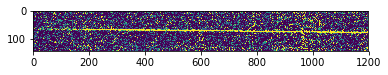

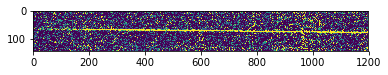

'how to save a fits file'

In [106]:
file_2=pyfits.open('LICKPALMMT_highz/LICKPALMMT_highz/1604/Liu149_PA4_2d.fits')
print(shape(file_2))
hdr=file_2[0].header

plt.imshow(np.flipud(file_2[0].data)[:], vmin=0, vmax=20)
plt.show()

plt.imshow(np.flipud(file_2[0].data)[0:220,:], vmin=0, vmax=20)
plt.show()

#pyfits.writeto('LICKPALMMT_highz/LICKPALMMT_highz/0808/Liu016_PA-123_2d_cut.fits', np.flipud(file_2[0].data)[0:220,:], hdr)

'''how to save a fits file'''